<div style="background-color: #ffffff; color: #333; padding: 15px; border: 1px solid #ddd; border-radius: 8px;">
    <a class="anchor" id="1st-bullet"></a>
    <h2 style="color: #795548; font-weight: bold; text-align: center;">Group Project - Clustering</h2>
    <h3 style="color: #a1887f; text-align: center;">Data Mining 2024/2025</h3>
</div>

<div style="text-align: center;">
    <strong>Group 14</strong>
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Francisco Santos</td>
            <td style="border: 1px solid white; padding: 8px;">20240562</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Margarida Raposo</td>
            <td style="border: 1px solid white; padding: 8px;">20241020</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Nuno Nunes</td>
            <td style="border: 1px solid white; padding: 8px;">20240560</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Teresa Menezes</td>
            <td style="border: 1px solid white; padding: 8px;">20240333</td>
        </tr>
    </table>
</div>

### **Structure**
1. [Scale Features](#add)
2. [Define Perspectives](#add)
2. [Hierarchical](#add)
2. [K-Means](#add)
2. [Merging Perspectives](#add)
2. [](#add)

# Imports 

In [1]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
from math import ceil

from scipy import stats

import warnings

In [2]:
from os.path import join

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.base import clone

In [3]:
from os.path import join

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.base import clone
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [4]:
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from minisom import MiniSom

from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# To create hexagons
from matplotlib.patches import RegularPolygon

# Plotting
from matplotlib import cm # For colormap handling
import matplotlib.colors as mpl_colors
from matplotlib import colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable # For axe customization

# For cluster's visualization
from sklearn.manifold import TSNE
import umap

import warnings
warnings.filterwarnings("ignore")

from sklearn.manifold import TSNE
import umap.umap_ as umap



In [5]:
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# clustering
from minisom import MiniSom
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# to create hexagons
from matplotlib.patches import RegularPolygon
# to create rectangles
from matplotlib.patches import Rectangle

# plotting
from matplotlib import cm # for colormap handling
import matplotlib.colors as mpl_colors
from matplotlib import colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable # for axe customization

# for cluster's visualization
from sklearn.manifold import TSNE
import umap

# to handle warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('df2.csv', index_col=0)

In [8]:
df.head()

CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e       0.000000   0.000000            0.0       0.0   
5d272b9dcb       0.045751   0.007126            0.0       0.0   
f6d1b2ba63       0.032833   0.000000            0.0       0.0   
180c632ed8       0.000000   0.015278            0.0       0.0   
4eb37a6705       0.051997   0.045578            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  ...  chain_consumption  customer_city  \
customer_id                           ...                                     
1b8f824d5e     0.093442          0.0  ...                0.5              2   
5d272b9dcb     0.000000          0.0  ...                1.0              8   
f6d1b2ba63     0.000000          0.0  ...                1.0              4   
180c632ed8     0.057786          0.0  ...                0.5              4   
4eb37a6705     0.000000          0.0  ...                0.0              4   

             available_cuisines_city  cuisine_variety  last_promo  \
customer_id                                                         
1b8f824d5e                        15                1    DELIVERY   
5d272b9dcb                         8                2    DISCOUNT   
f6d1b2ba63                        12                1    DISCOUNT   
180c632ed8                        12                2    DELIVERY   
4eb37a6705                        12                2    NO PROMO   

             payment_method  age_group  customer_lifecycle_stage  \
customer_id                                                        
1b8f824d5e             DIGI       0-20                    Active   
5d272b9dcb             DIGI       0-20                    Active   
f6d1b2ba63             CASH      31-40                    Active   
180c632ed8             DIGI      21-30                    Active   
4eb37a6705             DIGI       0-20                    Active   

             peak_order_day  peak_order_hour  
customer_id                                   
1b8f824d5e            DOW_0            HR_18  
5d272b9dcb            DOW_0            HR_10  
f6d1b2ba63            DOW_0             HR_9  
180c632ed8            DOW_1            HR_11  
4eb37a6705            DOW_1             HR_8  

[5 rows x 69 columns]

In [9]:
# select columns representing orders per hour (HR_0 to HR_23)
orders_per_hour = df.loc[:, 'HR_0':'HR_9']


# select columns representing orders per day of the week (DOW_0 to DOW_6)
orders_per_dow = df.loc[:, 'DOW_0':'DOW_6']

# select columns representing the cuisine types (CUI_American to CUI_Thai)
cuisines = df.loc[:, 'CUI_American':'CUI_Thai']

# Correlation Matrix

In [10]:
categorical_features = ['last_promo', 'payment_method','age_group', 'customer_city', 
                        'customer_lifecycle_stage','peak_order_day','peak_order_hour','available_cuisines_city']

In [11]:
columns_to_drop = list(orders_per_hour.columns) + list(orders_per_dow.columns) + list(cuisines.columns) + categorical_features
df_corr = df.drop(columns_to_drop, axis=1)

In [12]:
df_corr

average_spending  customer_age  days_since_last_order  \
customer_id                                                          
1b8f824d5e           0.135354      0.046154               0.000000   
5d272b9dcb           0.088841      0.030769               0.000000   
f6d1b2ba63           0.040693      0.353846               0.000000   
180c632ed8           0.148244      0.169231               0.011236   
4eb37a6705           0.263107      0.076923               0.011236   
...                       ...           ...                    ...   
eb13c834e7           0.013276      0.907692               0.988764   
f7be3a1a84           0.014334      0.169231               0.988764   
fc924e1758           0.219144      0.076923               0.988764   
fcdbf7468b           0.208177      0.107692               0.988764   
d7c7face7e           0.021549      0.169231               1.000000   

             first_order  is_chain  last_order  order_frequency  \
customer_id                                                       
1b8f824d5e      0.000000  0.012048    0.000000         1.000000   
5d272b9dcb      0.000000  0.024096    0.000000         1.000000   
f6d1b2ba63      0.000000  0.024096    0.000000         1.000000   
180c632ed8      0.000000  0.012048    0.011236         0.497207   
4eb37a6705      0.000000  0.000000    0.011236         0.497207   
...                  ...       ...         ...              ...   
eb13c834e7      0.988889  0.012048    0.988764         0.000063   
f7be3a1a84      0.988889  0.012048    0.988764         0.000063   
fc924e1758      0.988889  0.000000    0.988764         0.000063   
fcdbf7468b      0.988889  0.012048    0.988764         0.000063   
d7c7face7e      1.000000  0.012048    1.000000         0.000000   

             product_count  total_amount_spent  total_orders  vendor_count  \
customer_id                                                                  
1b8f824d5e        0.018587            0.020106      0.010753         0.025   
5d272b9dcb        0.007435            0.013287      0.010753         0.025   
f6d1b2ba63        0.007435            0.006227      0.010753         0.000   
180c632ed8        0.011152            0.021996      0.010753         0.025   
4eb37a6705        0.018587            0.038837      0.010753         0.025   
...                    ...                 ...           ...           ...   
eb13c834e7        0.003717            0.000973      0.000000         0.000   
f7be3a1a84        0.003717            0.001051      0.000000         0.000   
fc924e1758        0.007435            0.016065      0.000000         0.000   
fcdbf7468b        0.011152            0.015261      0.000000         0.000   
d7c7face7e        0.003717            0.001580      0.000000         0.000   

             vendor_loyalty_score  relative_cuisine_variety  \
customer_id                                                   
1b8f824d5e                    0.5                  0.066667   
5d272b9dcb                    0.5                  0.250000   
f6d1b2ba63                    1.0                  0.083333   
180c632ed8                    0.5                  0.166667   
4eb37a6705                    0.5                  0.166667   
...                           ...                       ...   
eb13c834e7                    1.0                  0.066667   
f7be3a1a84                    1.0                  0.066667   
fc924e1758                    1.0                  0.083333   
fcdbf7468b                    1.0                  0.083333   
d7c7face7e                    1.0                  0.066667   

             chain_consumption  cuisine_variety  
customer_id                                      
1b8f824d5e                 0.5                1  
5d272b9dcb                 1.0                2  
f6d1b2ba63                 1.0                1  
180c632ed8                 0.5                2  
4eb37a6705                 0.0                2  
...                        ...              .

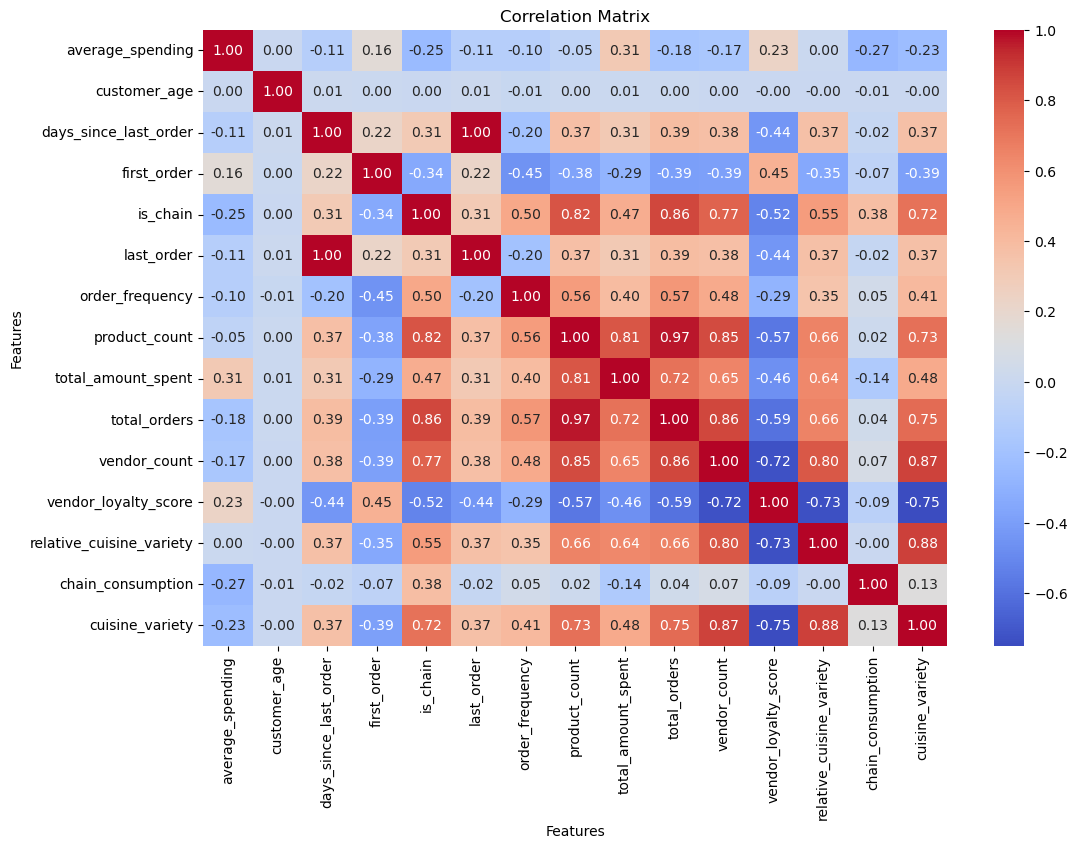

In [13]:
correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

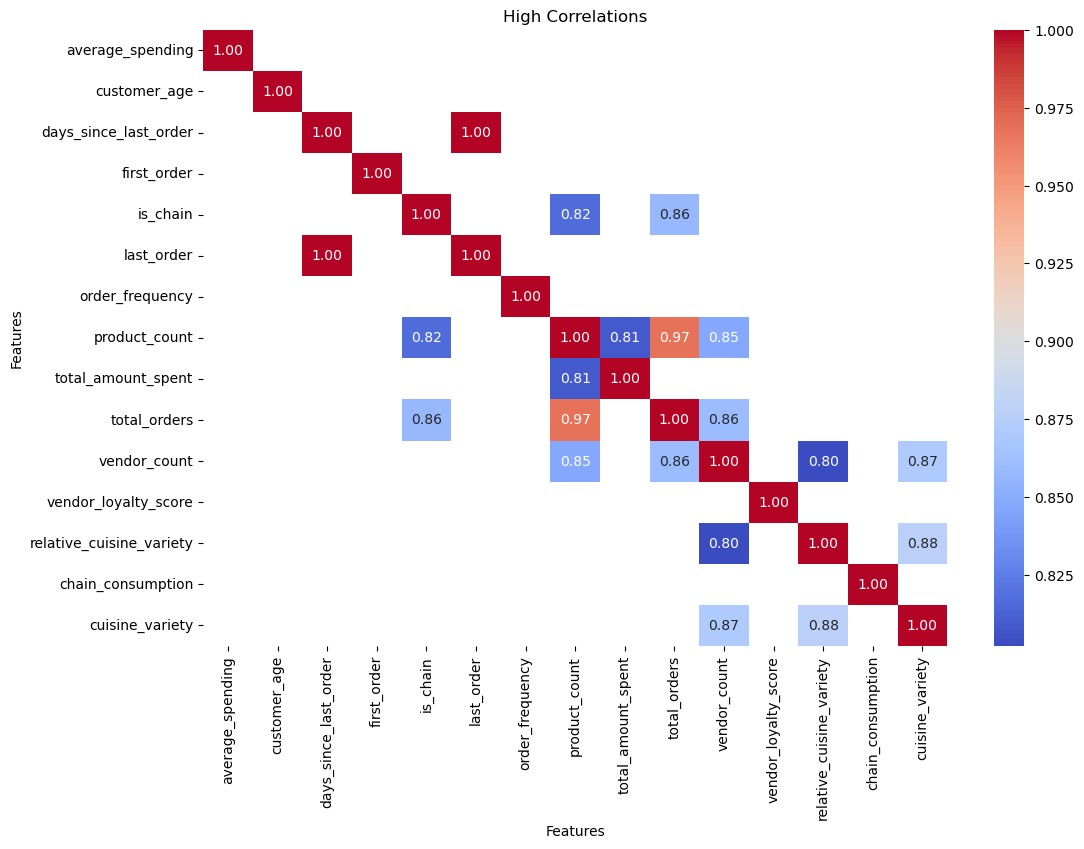

In [14]:
# Compute the correlation matrix
correlation_matrix = df_corr.corr()

# Filter the correlations above 0.8
high_corr_matrix = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with only high correlations
sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=high_corr_matrix.isna())

# Adding titles and labels
plt.title('High Correlations')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [15]:
df_corr.drop(['vendor_count', 'product_count', 'is_chain', 'last_order', 'cuisine_variety'], axis=1, inplace=True)

In [16]:
# final columns after selection
df_corr.columns

Index(['average_spending', 'customer_age', 'days_since_last_order',
       'first_order', 'order_frequency', 'total_amount_spent', 'total_orders',
       'vendor_loyalty_score', 'relative_cuisine_variety',
       'chain_consumption'],
      dtype='object')

In [17]:
# defining metric features for future use in the merging perspectives section
metric_features = df_corr.columns

In [18]:
# split data into metric and non metric
df_non_metric = df.select_dtypes(include=['object'])
df_metric = df.select_dtypes(include=['int64', 'float64'])

### Define Perspectives

- Preferential Perspective: vendor_loyalty_score, relative_cuisine_variety, chain_consumption
- Behavioural Perspective: first_order, days_since_last_order, order_frequency, total_orders, total_amount_spent, average_spending

In [19]:
preferences = df[['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']]

behaviours = df[['first_order','days_since_last_order', 'order_frequency', 'total_orders', 
                'total_amount_spent', 'average_spending']]

In [20]:
df_preferences = preferences.copy()
df_behaviours = behaviours.copy()

### K-Means

In [101]:
np.random.seed(42)

In [102]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# set up the clusterers
# n_init = 10 and random_state = 42
kmeans = KMeans(
    init='k-means++',
    n_init=10,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

#### Preference-based Perspective

#### Choosing Clustering Algorithm and Optimal Number of Clusters

In [103]:
# obtain the R² scores for each cluster solution on preferences variables
r2_scores_prf = {}
r2_scores_prf['kmeans'] = get_r2_scores(df_preferences, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores_prf[linkage] = get_r2_scores(
        df_preferences, hierarchical.set_params(linkage=linkage)
    )

# visualize the R² scores for each cluster solution on preferences variables
pd.DataFrame(r2_scores_prf).plot.line(figsize=(10,8))

plt.title("Preferences Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

- Since the graph indicates clearly that KMeans consistently achieves the highest R2 values, we decided to use it for our clusters.

In [104]:
# cluster range for preferential perspective
range_clusters_prf = range(1, 10)

In [105]:
# empty list to store the inertia values for each number of clusters
inertia_prf = []
for n_clus_prf in range_clusters_prf:  # iterate over desired ncluster range
    kmclust_prf = KMeans(n_clusters=n_clus_prf, init='k-means++', n_init=15, random_state=42)
    kmclust_prf.fit(preferences)
    inertia_prf.append(kmclust_prf.inertia_) 

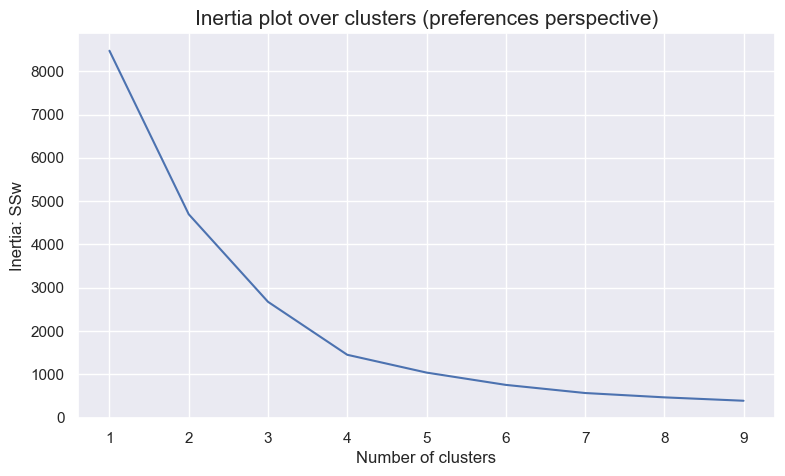

In [106]:
# inertia plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters_prf, inertia_prf)
ax.set_xticks(range_clusters_prf)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters (preferences perspective)", size=15)

plt.show()

In [107]:
warnings.filterwarnings("ignore")

# compute TSS (Total Sum of Squares)
tss = np.sum((preferences - preferences.mean())**2).sum()

# list to store R² scores for 3, and 4 clusters
r2_scores = []

# evaluate R² for 3, and 4 clusters
for n_clusters in [3, 4]:
    kmclust_prf = KMeans(n_clusters=n_clusters, init='k-means++', n_init=15, random_state=42)
    kmclust_prf.fit(preferences)
    wss_k = kmclust_prf.inertia_  # WSS for the current number of clusters
    r2 = 1 - (wss_k / tss)  # calculate R²
    r2_scores.append((n_clusters, r2))

# display the results
for n_clusters, r2 in r2_scores:
    print(f"R² score for {n_clusters} clusters: {r2:.4f}")

R² score for 3 clusters: 0.6842
R² score for 4 clusters: 0.8286


In [108]:
# KMeans clustering algorithm
# grouped into 4 clusters
# 'k-means++' method for centroid initialization
# run the KMeans algorithm 15 times with different initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_prf = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=42)
cluster_labels_prf = kmclust_prf.fit_predict(preferences)

- From this Elbow plot, we can observe that the optimal number of clusters for the preferences perspective is 3, as this is the point where the rate of decrease in within-cluster sum of squares (WSS) significantly slows down.

In [109]:
# Evaluate the clustering quality using silhouette score and Davies-Bouldin index

# The silhouette score ranges from -1 to 1, where a higher value indicates better clustering
silhouette_avg_prf = silhouette_score(preferences, cluster_labels_prf, metric="euclidean")
print(f'Silhouette Score: {round(silhouette_avg_prf,3)}') 

db_avg_prf = davies_bouldin_score(preferences, cluster_labels_prf)
# The Davies-Bouldin index ranges from 0 to infinity, where a lower value indicates better clustering
print(f'Davies-Bouldin Index: {round(db_avg_prf,3)}')

Silhouette Score: 0.575
Davies-Bouldin Index: 0.592


- From the Silhouette plot, for the preferences perspective, the optimal number of clusters is 5, as this is the point where the average silhouette score reaches its peak. 

### KMeans Implementation on Preference-based

In [110]:
# final cluster solution of the preferential perspective
number_clusters_prf = 4
kmclust_prf = KMeans(n_clusters=number_clusters_prf, init='k-means++', n_init=15, random_state=42)
km_labels_prf = kmclust_prf.fit_predict(preferences)
df['preferences_labels'] = km_labels_prf

In [111]:
# characterizing the final clusters of the preferential perspective
df_concat = pd.concat((preferences, pd.Series(km_labels_prf, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_loyalty_score  relative_cuisine_variety  chain_consumption
labels                                                                   
0                   0.359845                  0.247770           0.308149
1                   0.320032                  0.244238           0.890840
2                   1.000000                  0.098083           0.000000
3                   1.000000                  0.088947           1.000000

In [112]:
# add the cluster labels to the original data for profiling
df_with_labels_prf = preferences.copy()
df_with_labels_prf['Cluster Labels'] = km_labels_prf

# compute the cluster profile
km_profile_prf = df_with_labels_prf.groupby('Cluster Labels').mean().T

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(km_profile_prf,
            center=0, annot=True, cmap="BrBG", fmt=".2f",
            ax=ax)
ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 5 Clusters (Preferential Perspective)")
plt.show()

In [113]:
# add KMeans cluster labels to the DataFrame
df_preferences['km_labels_prf'] = km_labels_prf

# specify the features to plot
preferences = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']

# group by 'km_cluster' and compute the mean
cluster_means = df_preferences[preferences + ['km_labels_prf']].groupby('km_labels_prf').mean()

# coolwarm colormap to color the bars
cmap = cm.coolwarm
vendor_loyalty_score_color = cmap(0.1)
relative_cuisine_variet_color = cmap(0.4)
chain_consumption_color = cmap(0.8)

colors = [vendor_loyalty_score_color, relative_cuisine_variet_color, chain_consumption_color]

ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Preferential KMeans Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [114]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_preferences)  # get total sum of squares
ssw_labels = df_preferences[preferences + ['km_labels_prf']].groupby('km_labels_prf').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
round(r2, 3)

0.965

In [115]:
# add the cluster labels to the DataFrame
df['Cluster_Pr'] = km_labels_prf

# select a subset of features for the pair plot, including the cluster label
features_to_plot_prf = preferences + ['Cluster_Pr'] 

# create a DataFrame for plotting
plot_df_prf = df[features_to_plot_prf]

# create the pair plot
sns.pairplot(plot_df_prf, hue='Cluster_Pr', palette='plasma', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Preferential Perspective Clusters', y=1.02)
plt.show()

In [116]:
## U-map to visualize the clusters

reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
embedding = reducer.fit_transform(df_preferences[preferences])
embedding

plt.scatter(embedding[:, 0], embedding[:, 1], c= df_preferences['km_labels_prf'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

In [117]:
## T-sne to visualize the clusters:
two_dim = TSNE(random_state=42).fit_transform(df_preferences[preferences])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_preferences['km_labels_prf'], colormap='tab10', figsize=(15,10))
plt.show()

#### Behaviour-based Perspective

#### Choosing Clustering Algorithm and Optimal Number of Clusters

In [118]:
# define the R² calculation function
def r2(df, labels):
    overall_mean = df.mean(axis=0)
    clusters = pd.DataFrame({'cluster': labels, 'count': 1}).groupby('cluster').sum()
    cluster_means = pd.DataFrame({'cluster': labels}).join(df).groupby('cluster').mean()

    ss_between = sum(
        clusters['count'][k] * ((cluster_means.loc[k] - overall_mean) ** 2).sum()
        for k in clusters.index
    )
    ss_total = ((df - overall_mean) ** 2).sum().sum()
    return ss_between / ss_total

# define function to get R² scores for varying cluster counts
def get_r2_scores(df, clusterer, min_k=2, max_k=9):
    r2_clust = {}
    for n in range(min_k, max_k + 1):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

# normalize the behavioural features
scaler = StandardScaler()
df_behaviours_scaled = pd.DataFrame(scaler.fit_transform(df_behaviours), columns=df_behaviours.columns)

# set up clusterers
kmeans = KMeans(init='k-means++', n_init=10, random_state=42)
hierarchical = AgglomerativeClustering(metric='euclidean')

# compute R² scores for behavioural variables
r2_scores_beh = {}
r2_scores_beh['kmeans'] = get_r2_scores(df_behaviours_scaled, kmeans, min_k=2, max_k=9)

for linkage in ['complete', 'average', 'single', 'ward']:
    hierarchical.set_params(linkage=linkage)
    r2_scores_beh[linkage] = get_r2_scores(df_behaviours_scaled, hierarchical, min_k=2, max_k=9)

# convert results to a DataFrame
r2_scores_df = pd.DataFrame(r2_scores_beh)

# visualizing the R² scores for each cluster solution on behavioural variables
pd.DataFrame(r2_scores_beh).plot.line(figsize=(10,8))

plt.title("Behavioural Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

- We chose to use KMeans for our clusters because the graph clearly shows that it consistently achieves the highest R² values.

In [119]:
# cluster range for behavioural perspective
range_clusters_beh = range(1, 10)

In [120]:
# empty list to store the inertia values for each number of clusters
inertia_beh = []
for n_clus_beh in range_clusters_beh:  # iterate over desired ncluster range
    kmclust_beh = KMeans(n_clusters=n_clus_beh, init='k-means++', n_init=15, random_state=42)
    kmclust_beh.fit(behaviours)
    inertia_beh.append(kmclust_beh.inertia_)

In [121]:
# inertia plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters_beh, inertia_beh)
ax.set_xticks(range_clusters_beh)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters (behavioural perspective)", size=15)

plt.show()

- Since we were uncertain whether the optimal number of clusters was 4, or 5, we calculated the R² score for all cluster values, though we focused on the results for these three.

In [122]:
warnings.filterwarnings("ignore")

# compute TSS (Total Sum of Squares)
tss = np.sum((behaviours - behaviours.mean())**2).sum()

# list to store R² scores for all the clusters
r2_scores = []

# evaluate R² 
for n_clusters in [4, 5]:
    kmclust_beh = KMeans(n_clusters=n_clusters, init='k-means++', n_init=15, random_state=42)
    kmclust_beh.fit(behaviours)
    wss_k = kmclust_beh.inertia_ 
    r2 = 1 - (wss_k / tss) 
    r2_scores.append((n_clusters, r2))

# Display the results
for n_clusters, r2 in r2_scores:
    print(f"R² score for {n_clusters} clusters: {r2:.4f}")

R² score for 4 clusters: 0.4960
R² score for 5 clusters: 0.5688


- From the values, we can conclude that the optimal number of clusters for the behavioural perspective is 5, since the R² score reaches its highest value on that point, amount the previous three described.

In [123]:
# KMeans clustering algorithm
# grouped into 5 clusters
# 'k-means++' method for centroid initialization
# run the KMeans algorithm 15 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs 
kmclust_beh = KMeans(n_clusters=5, init='k-means++', n_init=15, random_state=42)
cluster_labels_beh = kmclust_beh.fit_predict(behaviours)

In [124]:
# Evaluate the clustering quality using silhouette score and Davies-Bouldin index

# The silhouette score ranges from -1 to 1, where a higher value indicates better clustering
silhouette_avg_beh = silhouette_score(behaviours, cluster_labels_beh, metric="euclidean")
print(f'Silhouette Score: {round(silhouette_avg_beh,3)}') 

db_avg_beh = davies_bouldin_score(behaviours, cluster_labels_beh)
# The Davies-Bouldin index ranges from 0 to infinity, where a lower value indicates better clustering
print(f'Davies-Bouldin Index: {round(db_avg_beh,3)}')

Silhouette Score: 0.302
Davies-Bouldin Index: 1.055


### KMeans Implementation on Behaviour-based

In [125]:
# final cluster solution of the behavioural perspective
number_clusters_beh = 5
kmclust_beh = KMeans(n_clusters=number_clusters_beh, init='k-means++', n_init=15, random_state=42)
km_labels_beh = kmclust_beh.fit_predict(behaviours)
df['behaviours_labels'] = km_labels_beh

In [126]:
# characterizing the final clusters of the behavioural perspective
df_concat = pd.concat((behaviours, pd.Series(km_labels_beh, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

first_order  days_since_last_order  order_frequency  total_orders  \
labels                                                                      
0          1.297878               0.382097        -0.535260     -0.449060   
1         -0.568664               0.523352        -0.062905      0.163532   
2          0.423232              -0.192216        -0.383474     -0.419607   
3         -0.877085               0.690975         1.832504      2.327304   
4         -0.465380              -1.476485         0.206840     -0.446742   

        total_amount_spent  average_spending  
labels                                        
0                -0.426512         -0.121537  
1                -0.000740         -0.325035  
2                 0.486142          2.398290  
3                 2.142744         -0.085780  
4                -0.449299         -0.152368

In [127]:
# add the cluster labels to the original data for profiling
df_with_labels_beh = behaviours.copy()
df_with_labels_beh['Cluster Labels'] = km_labels_beh

# compute the cluster profile
km_profile_beh = df_with_labels_beh.groupby('Cluster Labels').mean().T

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(km_profile_beh,
            center=0, annot=True, cmap="BrBG", fmt=".2f",
            ax=ax)
ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 6 Clusters (Behavioural Perspective)")
plt.show()

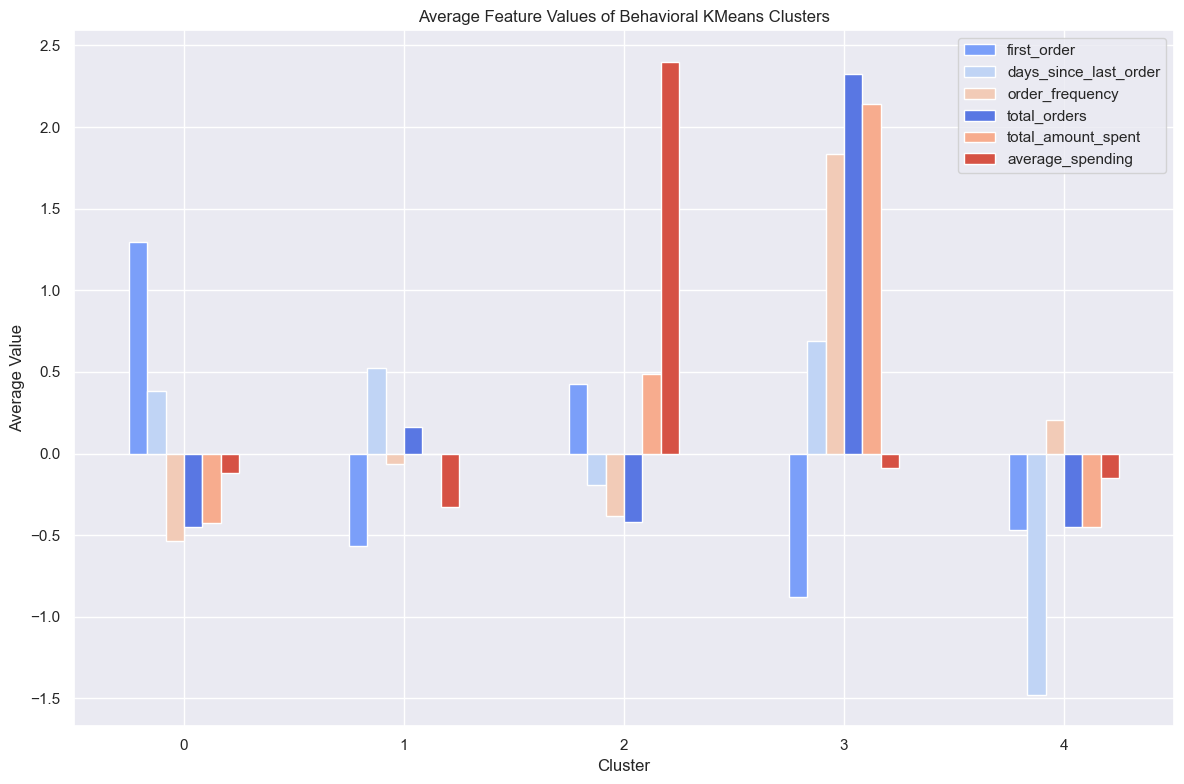

In [128]:
# add KMeans cluster labels to the DataFrame
df['km_labels_beh'] = km_labels_beh

# specify the features to plot
behaviours = ['first_order', 'days_since_last_order', 'order_frequency', 
              'total_orders', 'total_amount_spent', 'average_spending']

# select the relevant columns from the DataFrame
plot_df_beh = df[behaviours + ['km_labels_beh']]

# group by 'km_labels_beh' and compute the mean of each cluster
cluster_means = plot_df_beh.groupby('km_labels_beh').mean()

# use the coolwarm colormap to color the bars
cmap = cm.coolwarm
first_order_color = cmap(0.2)
days_since_last_order_color = cmap(0.4)
order_frequency_color = cmap(0.6)
total_orders_color = cmap(0.1)
total_amount_spent_color = cmap(0.7)
average_spending_color = cmap(0.9)

colors = [first_order_color, days_since_last_order_color, order_frequency_color, 
          total_orders_color, total_amount_spent_color, average_spending_color]

# plotting the bar plot
ax = cluster_means.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Average Feature Values of Behavioral KMeans Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [129]:
df_behaviours['km_labels_beh'] = km_labels_beh

# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_behaviours[behaviours])  # get total sum of squares

ssw_labels = (
    df_behaviours[behaviours + ['km_labels_beh']]
    .groupby('km_labels_beh')
    .apply(get_ss)  # compute SSW for each cluster
)

ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
round(r2, 3)

0.569

In [130]:
# add cluster labels to the DataFrame
df['Cluster'] = km_labels_beh

# select features for plotting (ensure all columns exist in df)
features_to_plot = behaviours + ['Cluster'] 
# create a DataFrame for plotting
plot_df = df[features_to_plot]

sns.pairplot(plot_df, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Behavioural Perspective Clusters', y=1.02)
plt.show()

In [132]:
## U-map to visualize the clusters

reducer_beh = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
embedding_beh = reducer_beh.fit_transform(df_behaviours[behaviours])
embedding_beh

plt.scatter(embedding_beh[:, 0], embedding_beh[:, 1], c= df_behaviours['km_labels_beh'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

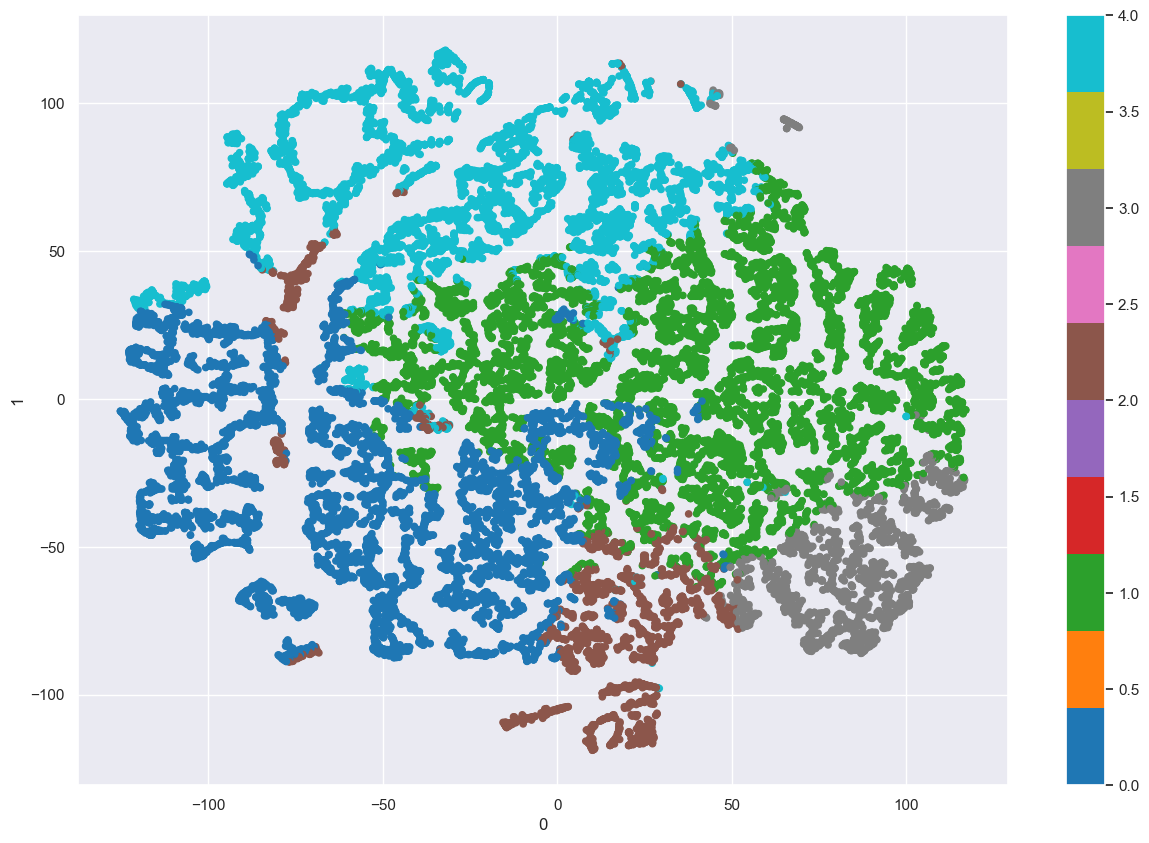

In [133]:
## T-sne to visualize the clusters:
two_dim_beh = TSNE(random_state=42).fit_transform(df_behaviours[behaviours])

# t-SNE visualization
pd.DataFrame(two_dim_beh).plot.scatter(x=0, y=1, c=df_behaviours['km_labels_beh'], colormap='tab10', figsize=(15,10))
plt.show()

## Self-Organizing Maps

### Preference-based Perspective

In [ ]:
# deciding the grid size for the SOM using a formula based on the number of rows in the dataset
grid_size = 5 * (preferences.shape[0] ** 0.5)

print(f'The product of M and N should be close to {round(grid_size,2)}')
print(f'Thus M and N should be close to {round(grid_size ** 0.5,2)}')

The product of M and N should be close to 887.76
Thus M and N should be close to 29.8


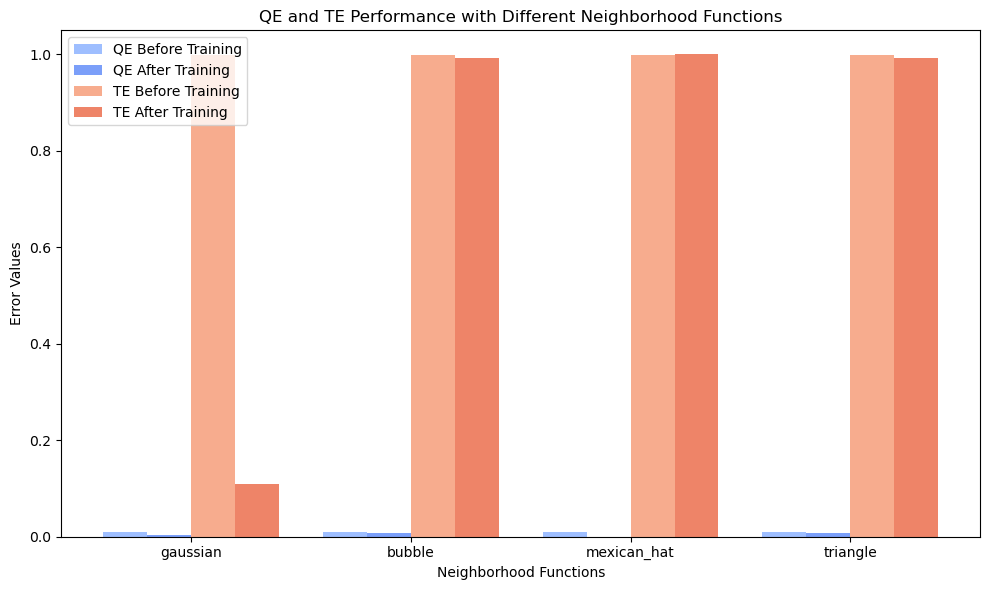

In [ ]:
# comparing the performance of different neighborhood functions
som_data = preferences.values

sigma = 1
learning_rate = 0.9
M = 30
N = 30  
n_feats = len(preferences.columns) # number of features used in the SOM

# list of neighborhood functions to test
neighborhood_functions = ['gaussian', 'bubble', 'mexican_hat', 'triangle']

# lists to store QE and TE values for each neighborhood function
qe_values = []
te_values = []

# train the SOM with each neighborhood function
for func in neighborhood_functions:
    sm = MiniSom(M, N, n_feats,
                 sigma=sigma, 
                 neighborhood_function=func, 
                 learning_rate=learning_rate, 
                 topology='hexagonal', 
                 random_seed=42)
    
    # initialize the weights of the SOM picking random samples from data
    sm.random_weights_init(som_data)
    
    # errors before training
    qe_before = sm.quantization_error(som_data)
    te_before = sm.topographic_error(som_data)
    
    # train the SOM
    sm.train_batch(preferences.values,
                   num_iteration=50000)
    
    # errors after training
    qe_after = sm.quantization_error(som_data)
    te_after = sm.topographic_error(som_data)
    
    # store QE and TE values after training
    qe_values.append((qe_before, qe_after))
    te_values.append((te_before, te_after))

fig, ax = plt.subplots(figsize=(10, 6))

# plot QE and TE for each neighborhood function
width = 0.2  # width of the bars
x_pos = np.arange(len(neighborhood_functions))  # position for each neighborhood function

# use specific colors from coolwarm colormap to color the bars in the plot
cmap = cm.coolwarm
qe_before_color = cmap(0.3)
qe_after_color = cmap(0.2)
te_before_color = cmap(0.7)
te_after_color = cmap(0.8)   

# plot QE values
ax.bar(x_pos - width, [qe[0] for qe in qe_values], width, label="QE Before Training", color=qe_before_color)
ax.bar(x_pos, [qe[1] for qe in qe_values], width, label="QE After Training", color=qe_after_color)

# plot TE values
ax.bar(x_pos + width, [te[0] for te in te_values], width, label="TE Before Training", color=te_before_color)
ax.bar(x_pos + 2*width, [te[1] for te in te_values], width, label="TE After Training", color=te_after_color)

# customize plot
ax.set_xlabel('Neighborhood Functions')
ax.set_ylabel('Error Values')
ax.set_title('QE and TE Performance with Different Neighborhood Functions')
ax.set_xticks(x_pos + width / 2)  # align tick labels with the grouped bars
ax.set_xticklabels(neighborhood_functions)
ax.legend()

# display plot
plt.tight_layout()
plt.show()

In [ ]:
# actual training of the SOM and exact error values

sigma = 1
learning_rate = 0.9 # the learning rate value was chosen by experimenting and comparing QE and TE values
num_iteration = 5
M = 30
N = 30

sm = MiniSom(
   M, N, len(preferences.columns),
   sigma=sigma,
   learning_rate=learning_rate,
   neighborhood_function='gaussian', # according to the previous plot, the gaussian function performed better
   topology = 'hexagonal', # both hexagonal and rectangular topologies were tested, hexagonal performed better
   random_seed=42)

# initialize the weights of the SOM picking random samples from data
sm.random_weights_init(preferences.values)

# initial quantization and topographic errors
initial_qe = sm.quantization_error(preferences.values)
initial_te = sm.topographic_error(preferences.values)

# train the SOM
sm.train(preferences.values,
           use_epochs=True,
           random_order=True,
           num_iteration=num_iteration)

# final quantization and topographic errors
final_qe = sm.quantization_error(preferences.values)
final_te = sm.topographic_error(preferences.values)

print(f'Intital quantization error vs After training {np.round([initial_qe, final_qe], 4)}')
print(f'Intital topographic error vs After training {np.round([initial_te, final_te], 4)}')

Intital quantization error vs After training [0.0096 0.0043]
Intital topographic error vs After training [0.9994 0.0528]


In [ ]:
# storing the weights of the neurons after training
weights = sm.get_weights()
weights.shape

(30, 30, 3)

In [ ]:
# function to plot the hexagons, reused from the practical sessions
def plot_hexagons(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Greys,    # colormap to use
                  annot=False):     

    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            hex = RegularPolygon((wx, wy), 
                                numVertices=6, 
                                radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, 
                                edgecolor='white',
                                linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, 
                        ha='center', va='center', 
                        fontsize='small')

    # remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    # add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    # create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    # create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # add colorbar to plot
    sf.add_axes(ax_cb)

    return sf 

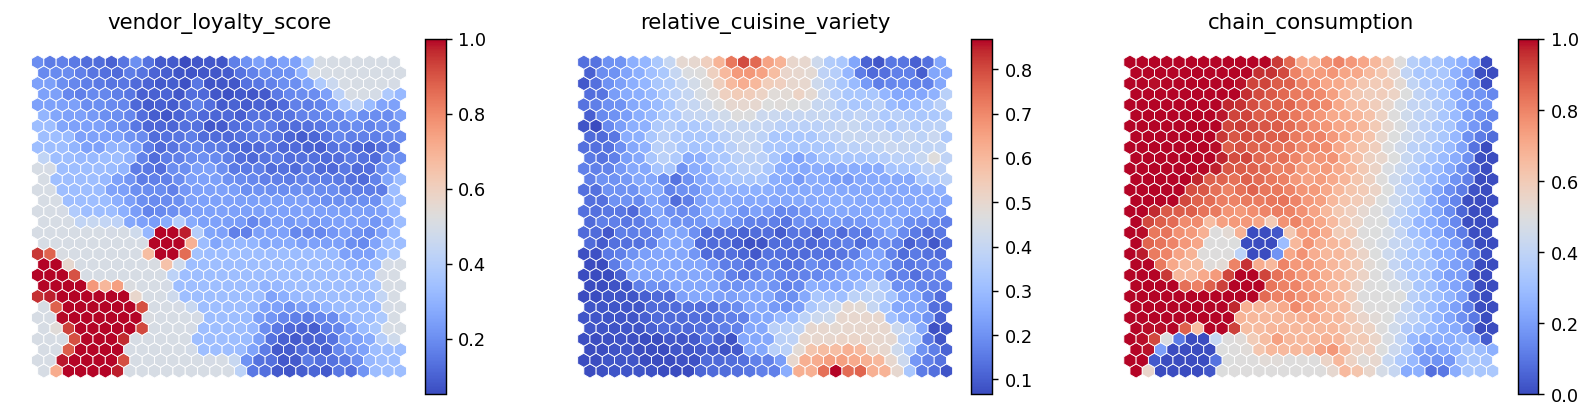

In [ ]:
# plot the hexagons for each feature in the perspective
figsize=(12, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(1, 3, wspace=0.2, hspace=0.4) # create subfigures for each perspective

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights)) # color normalization

for cpi, sf in zip(range(len(preferences.columns)), subfigs.flatten()):
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)])) # max absolute value for color normalization
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals)) # color normalization

    sf = plot_hexagons(
        sm, sf, 
        colornorm,
        matrix_vals,
        label=preferences.columns[cpi],
        cmap=cm.coolwarm)

In [ ]:
# plot the U-matrix for the SOM 
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix)) # color normalization

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    umatrix,
                    label="Preferences U-matrix",
                    cmap=cm.coolwarm,
                    annot=True)

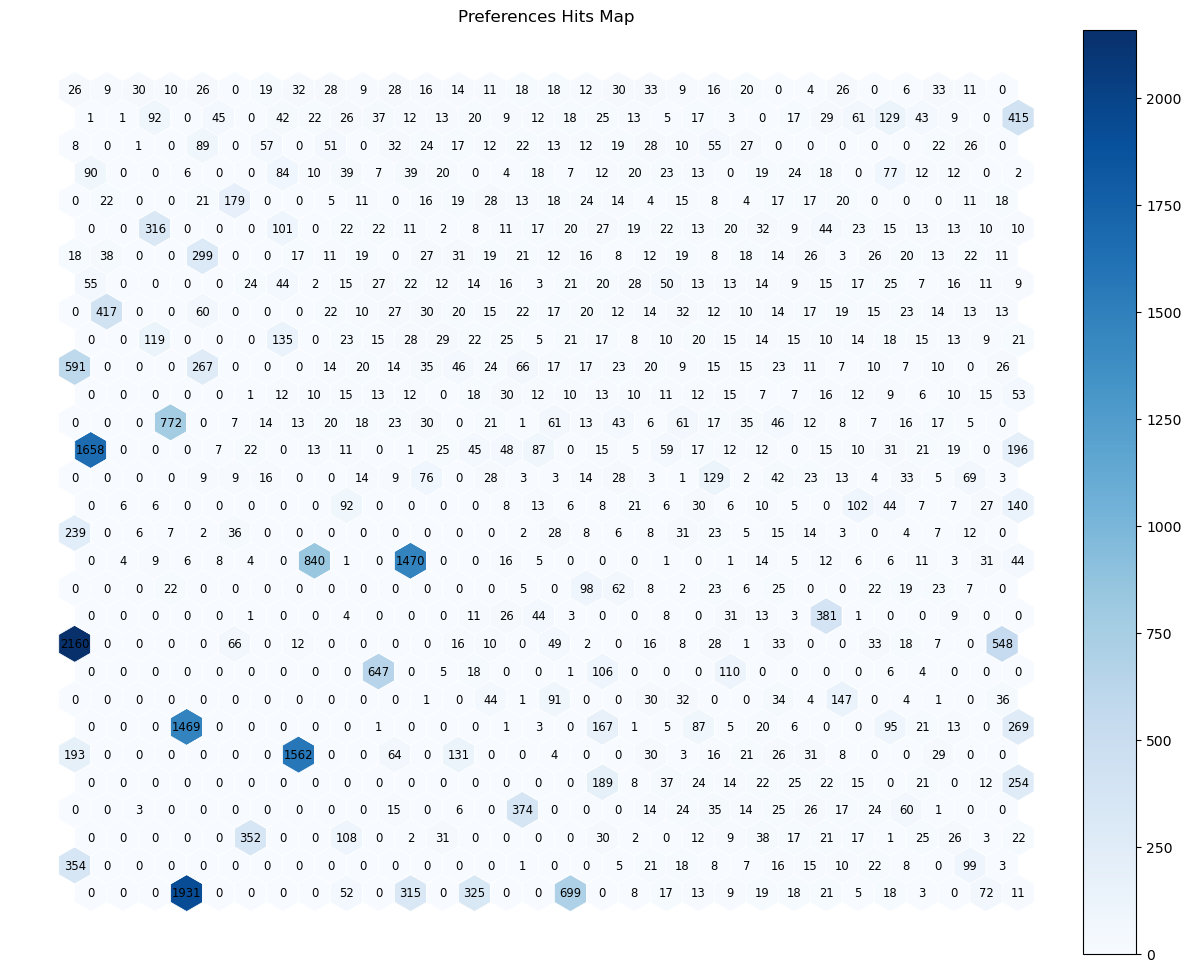

In [ ]:
# plot the hits map for the SOM
hitsmatrix = sm.activation_response(preferences.values)

fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix)) # color normalization

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="Preferences Hits Map",
                    cmap=cm.Blues,
                    annot=True)

### K-Means implementation

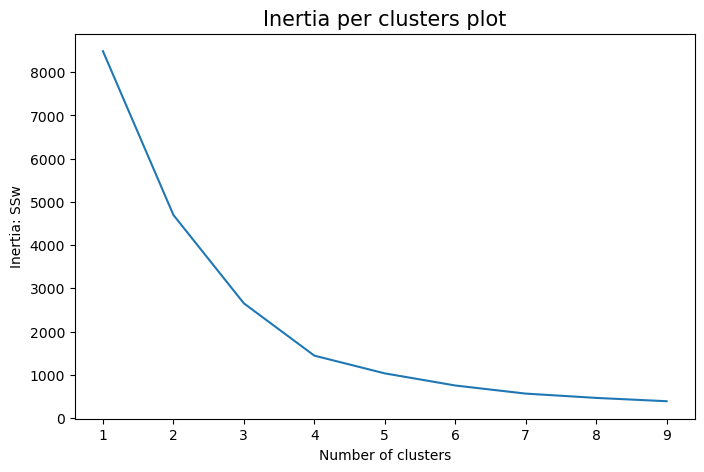

In [ ]:
# deciding on the optimal number of clusters to use in the KMeans model
# defining the range of clusters to test
range_clusters = range(1, 10)

# list to store the inertia values for each number of clusters
inertia = []

# train the KMeans model for each number of clusters
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(preferences)
    inertia.append(kmclust.inertia_)

# plot inertia
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia per clusters plot", size=15)

plt.show()

In [ ]:
# flattened the weights of the neurons into a 2D list
preferences_weights_flat = sm.get_weights().reshape((M*N),len(preferences.columns))
preferences_weights_flat.shape

(900, 3)

In [ ]:
# perform K-Means clustering on top of the SOM weights
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
kmeans_preferences_labels = kmeans.fit_predict(preferences_weights_flat)

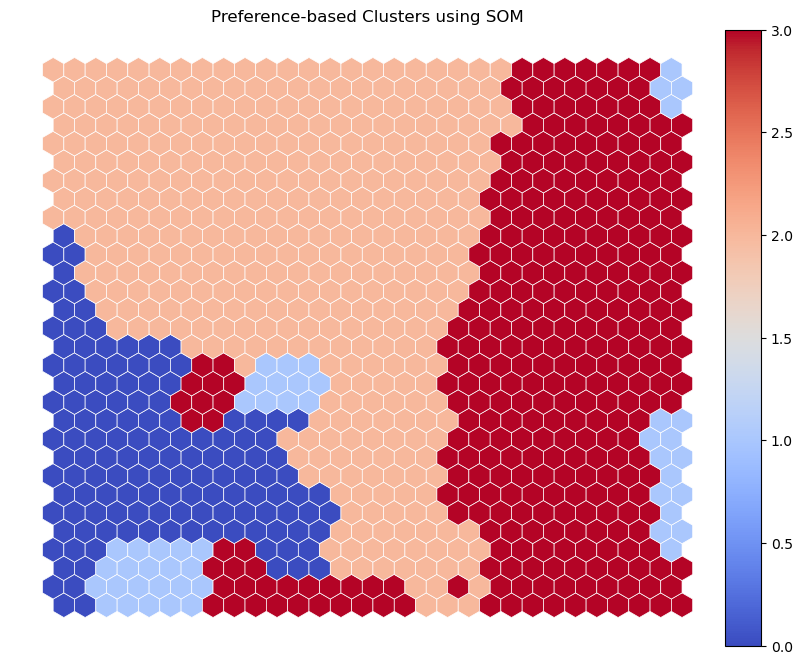

In [ ]:
# plot the clusters on the SOM
kmeans_matrix = kmeans_preferences_labels.reshape((M,N)) # reshape the labels to the SOM shape

fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(kmeans_matrix)) # color normalization

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    kmeans_matrix,
                    label="Preference-based Clusters using SOM",
                    cmap=cm.coolwarm)

In [ ]:
# evaluate the clustering quality using silhouette score and Davies-Bouldin index

som_preferences_score = silhouette_score(preferences_weights_flat, kmeans_preferences_labels, metric='euclidean')
# the silhouette score ranges from -1 to 1, where a higher value indicates better clustering
print(f'Silhouette Score: {round(som_preferences_score,3)}') 

som_preferences_index = davies_bouldin_score(preferences_weights_flat, kmeans_preferences_labels)
# the Davies-Bouldin index ranges from 0 to infinity, where a lower value indicates better clustering
print(f'Davies-Bouldin Index: {round(som_preferences_index,3)}')

Silhouette Score: 0.382
Davies-Bouldin Index: 0.891


In [ ]:
# check the nodes and respective clusters
preferences_nodes = preferences_weights_flat

df_preferences_nodes = pd.DataFrame(preferences_nodes, columns=preferences.columns)
df_preferences_nodes['som_cluster'] = kmeans_preferences_labels
df_preferences_nodes

vendor_loyalty_score  relative_cuisine_variety  chain_consumption  \
0                0.500000                  0.066667       1.000000e+00   
1                0.500000                  0.066667       1.000000e+00   
2                0.500000                  0.066667       9.999994e-01   
3                0.500000                  0.070847       9.999942e-01   
4                0.500000                  0.083333       9.999981e-01   
..                    ...                       ...                ...   
895              0.248964                  0.372533       1.911584e-01   
896              0.321483                  0.368416       1.444003e-01   
897              0.499452                  0.246969       6.582402e-03   
898              0.500000                  0.250000       1.710867e-10   
899              0.500000                  0.247877       3.523011e-03   

     som_cluster  
0              0  
1              0  
2              0  
3              0  
4              0  
..           ...  
895            3  
896            3  
897            1  
898            1  
899            1  

[900 rows x 4 columns]

In [ ]:
# get BMU coordinates for each data point
bmu_index = np.array([sm.winner(x) for x in preferences.values])

print(bmu_index.shape)

bmu_index

(31525, 2)


array([[8, 0],
       [9, 8],
       [3, 6],
       ...,
       [3, 0],
       [3, 6],
       [0, 9]], dtype=int64)

In [ ]:
# get the final labels for each data point
som_final_preferences_labels = [kmeans_matrix[i[0]][i[1]] for i in bmu_index]

In [ ]:
# add the final labels to the main dataframe
df['prf_som_cluster'] = som_final_preferences_labels

df.head()

CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e       0.000000   0.000000            0.0       0.0   
5d272b9dcb       0.045751   0.007126            0.0       0.0   
f6d1b2ba63       0.032833   0.000000            0.0       0.0   
180c632ed8       0.000000   0.015278            0.0       0.0   
4eb37a6705       0.051997   0.045578            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e     0.093442          0.0           0.0                0.0   
5d272b9dcb     0.000000          0.0           0.0                0.0   
f6d1b2ba63     0.000000          0.0           0.0                0.0   
180c632ed8     0.057786          0.0           0.0                0.0   
4eb37a6705     0.000000          0.0           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai   DOW_0     DOW_1  \
customer_id                                                                    
1b8f824d5e         0.0                       0.0       0.0  0.0625  0.000000   
5d272b9dcb         0.0                       0.0       0.0  0.0625  0.000000   
f6d1b2ba63         0.0                       0.0       0.0  0.0625  0.000000   
180c632ed8         0.0                       0.0       0.0  0.0000  0.058824   
4eb37a6705         0.0                       0.0       0.0  0.0000  0.058824   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_10     HR_11  \
customer_id                                                                   
1b8f824d5e     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.000000   
5d272b9dcb     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.04  0.027778   
f6d1b2ba63     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.027778   
180c632ed8     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.027778   
4eb37a6705     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.000000   

             HR_12  HR_13     HR_14  HR_15  HR_16  HR_17     HR_18  HR_19  \
customer_id                                                                 
1b8f824d5e     0.0    0.0  0.000000    0.0    0.0    0.0  0.083333    0.0   
5d272b9dcb     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   
f6d1b2ba63     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   
180c632ed8     0.0    0.0  0.076923    0.0    0.0    0.0  0.000000    0.0   
4eb37a6705     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   

             HR_2  HR_20  HR_21  HR_22  HR_23  HR_3  HR_4  HR_5  HR_6  HR_7  \
customer_id                                                                   
1b8f824d5e    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
5d272b9dcb    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
f6d1b2ba63    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
180c632ed8    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
4eb37a6705    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   

                 HR_8      HR_9  average_spending  customer_age  \
customer_id                                                       
1b8f824d5e   0.000000  0.000000          0.135354      0.046154   
5d272b9dcb   0.000000  0.000000          0.088841      0.030769   
f6d1b2ba63   0.000000  0.043478          0

In [ ]:
# characterize the final clusters
preferences_columns = preferences.columns.tolist()

preferences['prf_som_cluster'] = som_final_preferences_labels

preferences[preferences_columns + ['prf_som_cluster']].groupby('prf_som_cluster').mean()

vendor_loyalty_score  relative_cuisine_variety  \
prf_som_cluster                                                   
0                            0.778308                  0.116567   
1                            0.854927                  0.117951   
2                            0.235869                  0.290203   
3                            0.338932                  0.257132   

                 chain_consumption  
prf_som_cluster                     
0                         0.985599  
1                         0.000000  
2                         0.847737  
3                         0.360955

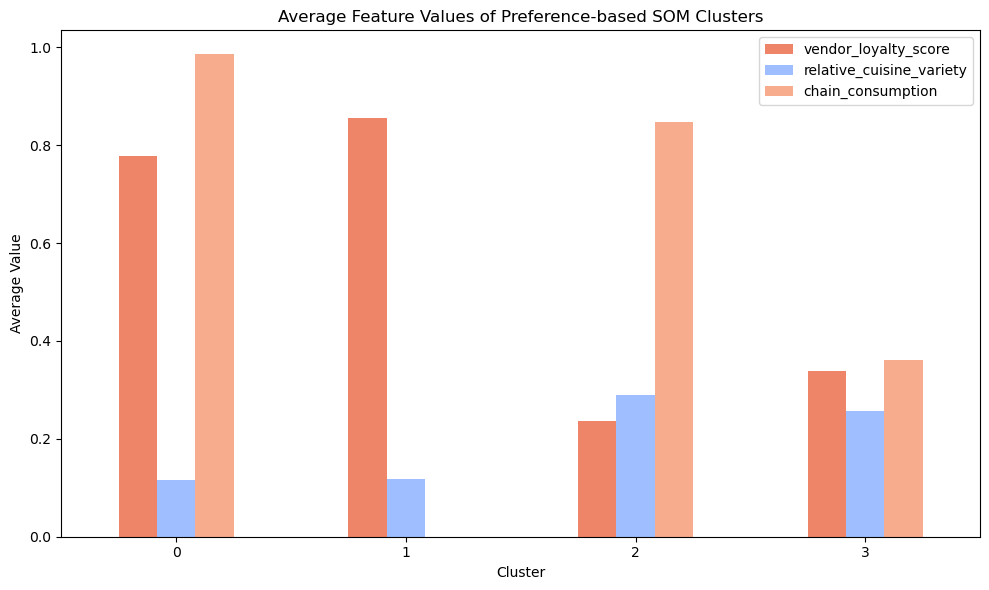

In [ ]:
# plot the average feature values of the clusters
features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']

# once more, group the features by cluster and compute the average values
cluster_means = preferences[features + ['prf_som_cluster']].groupby('prf_som_cluster').mean()

# use specific colors from coolwarm colormap to color the bars in the plot
cmap = cm.coolwarm
vendor_loyalty_score_color = cmap(0.8)
relative_cuisine_variety_color = cmap(0.3)
chain_consumption_color = cmap(0.7)

colors = [vendor_loyalty_score_color, relative_cuisine_variety_color, chain_consumption_color]

# plot the bar chart
ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Preference-based SOM Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [ ]:
# evaluate the clustering solution appropriateness using the R-squared metric
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(preferences)  # get total sum of squares
ssw_labels = preferences[preferences_columns + ['prf_som_cluster']].groupby('prf_som_cluster').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
round(r2, 3)

0.964

### Cluster visualization using U-Map

In [ ]:
# comparing the performance of different distance metrics, using their resulting silhouette score and Davies-Bouldin index
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'minkowski', 'hamming']

# list to store the results
results = []

# itereate over each distance metric
for metric in distance_metrics:
    # apply UMAP for dimensionality reduction
    reducer = umap.UMAP(n_neighbors=5, n_components=2, metric=metric)
    embedding = reducer.fit_transform(preferences[preferences_columns])

    # cluster the data using KMeans
    kmeans = KMeans(n_clusters=5, random_state=42).fit(embedding)
    cluster_labels = kmeans.labels_

    # evaluate the clustering quality
    silhouette = silhouette_score(embedding, cluster_labels)
    db_index = davies_bouldin_score(embedding, cluster_labels)

    results.append((metric, silhouette, db_index, silhouette + db_index))

# create a dataframe that contains the results
results_df = pd.DataFrame(results, columns=['Metric', 'Silhouette Score', 'Davies-Bouldin Index', 'Combined Score'])

# find the metric with the best (lowest) combined score
best_metric = results_df.loc[results_df['Combined Score'].idxmin(), 'Metric']

print("Best Metric:", best_metric)

Best Metric: cosine


In [ ]:
# apply UMAP for clustering visualization, using best performing distance metric
reducer = umap.UMAP(n_neighbors=5, n_components=2, metric='cosine') # n_neighbors was chosen by experimenting and comparing silhouette scores and Davies-Bouldin indexes
embedding = reducer.fit_transform(preferences[preferences_columns], y=preferences['prf_som_cluster']) 
embedding

array([[ 6.6304355, -4.9411283],
       [ 1.7214637,  2.2849195],
       [11.139182 , -5.543957 ],
       ...,
       [15.013937 , -4.901856 ],
       [ 9.510984 , -4.445147 ],
       [ 6.6162276, -8.338108 ]], dtype=float32)

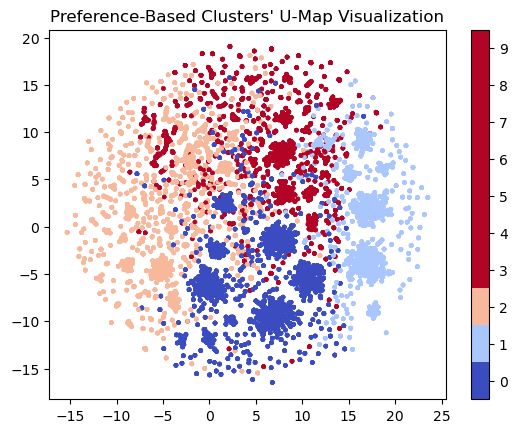

In [ ]:
# plot the clusters
plt.scatter(embedding[:, 0], embedding[:, 1], c= preferences['prf_som_cluster'], cmap='coolwarm', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("Preference-Based Clusters' U-Map Visualization")
plt.show()

In [ ]:
# evaluate the clustering solution
silhouette_avg = silhouette_score(embedding, preferences['prf_som_cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

db_index = davies_bouldin_score(embedding, preferences['prf_som_cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.23
Davies-Bouldin Index: 1.11


### Cluster visualization using t-SNE

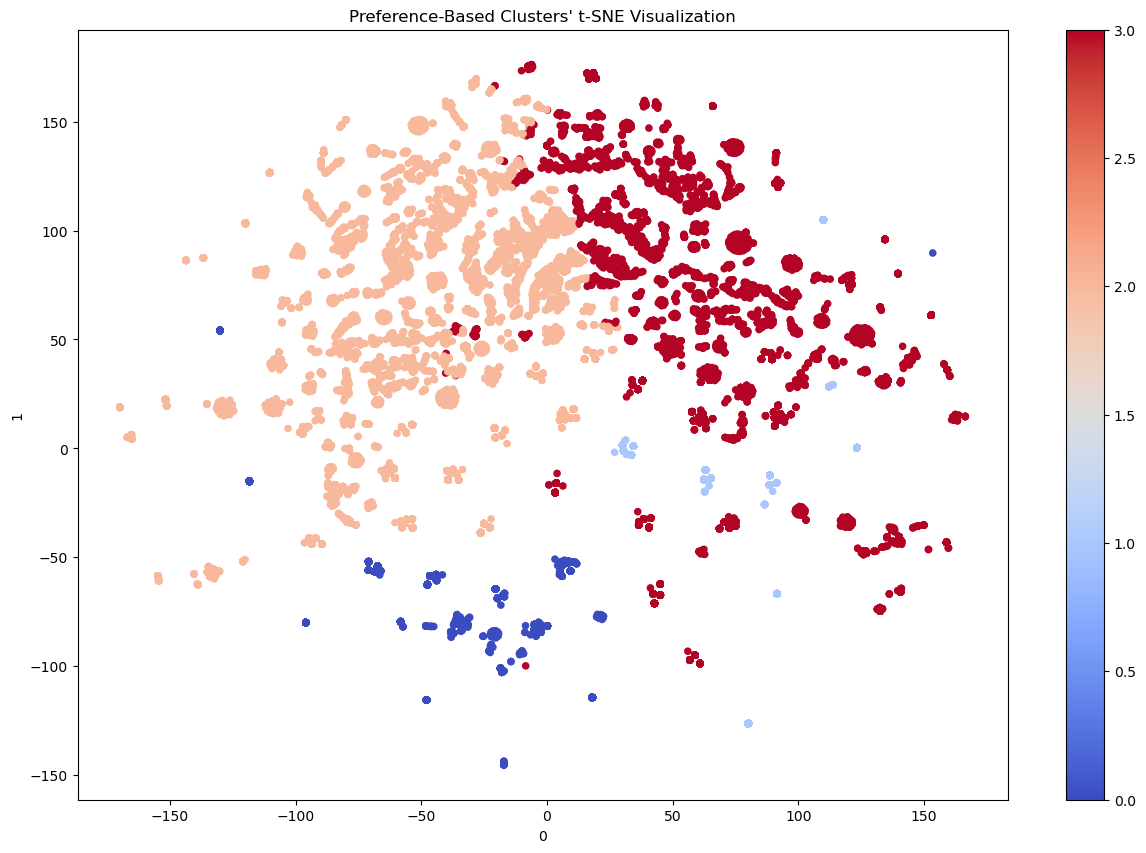

In [ ]:
# apply t-SNE
two_dim = TSNE(random_state=42).fit_transform(preferences[preferences_columns])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=preferences['prf_som_cluster'], colormap='coolwarm', figsize=(15,10))
plt.title("Preference-Based Clusters' t-SNE Visualization")
plt.show()

### Behavioral Perspective

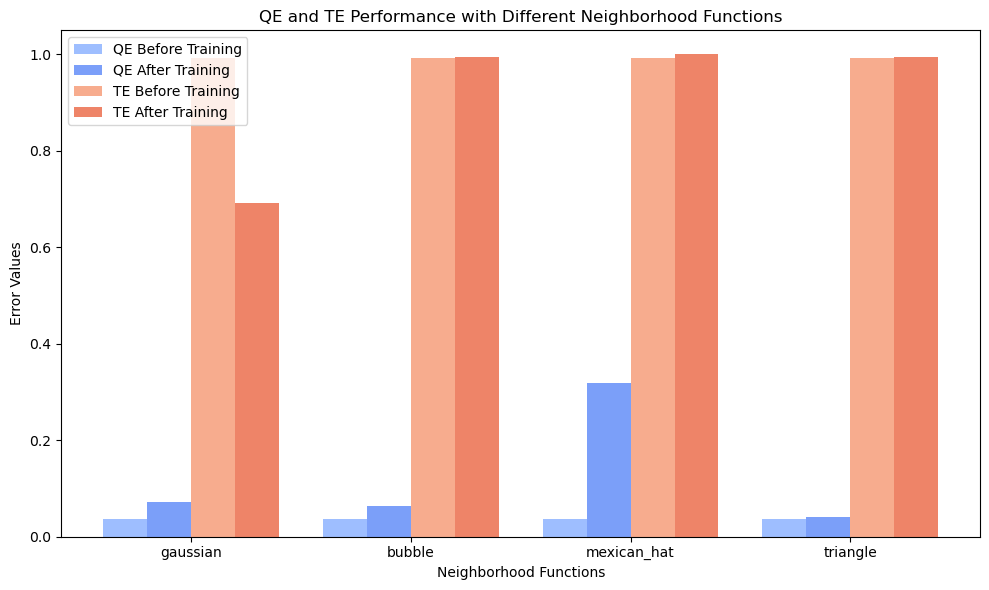

In [ ]:
# comparing the performance of different neighborhood functions
som_data = behaviours.values

sigma = 1
learning_rate = 0.9 
M = 30
N = 30  
n_feats = len(behaviours.columns)

neighborhood_functions = ['gaussian', 'bubble', 'mexican_hat', 'triangle']

qe_values = []
te_values = []

for func in neighborhood_functions:
    sm = MiniSom(M, N, n_feats,
                 sigma=sigma, 
                 neighborhood_function=func, 
                 learning_rate=learning_rate, 
                 topology='hexagonal', 
                 random_seed=42)
    
    sm.random_weights_init(som_data)
    
    qe_before = sm.quantization_error(som_data)
    te_before = sm.topographic_error(som_data)
    
    sm.train_batch(behaviours.values,
                   num_iteration=50000)
    
    qe_after = sm.quantization_error(som_data)
    te_after = sm.topographic_error(som_data)
    
    qe_values.append((qe_before, qe_after))
    te_values.append((te_before, te_after))

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.2
x_pos = np.arange(len(neighborhood_functions))

cmap = cm.coolwarm
qe_before_color = cmap(0.3)
qe_after_color = cmap(0.2)
te_before_color = cmap(0.7)
te_after_color = cmap(0.8)   

ax.bar(x_pos - width, [qe[0] for qe in qe_values], width, label="QE Before Training", color=qe_before_color)
ax.bar(x_pos, [qe[1] for qe in qe_values], width, label="QE After Training", color=qe_after_color)

ax.bar(x_pos + width, [te[0] for te in te_values], width, label="TE Before Training", color=te_before_color)
ax.bar(x_pos + 2*width, [te[1] for te in te_values], width, label="TE After Training", color=te_after_color)

ax.set_xlabel('Neighborhood Functions')
ax.set_ylabel('Error Values')
ax.set_title('QE and TE Performance with Different Neighborhood Functions')
ax.set_xticks(x_pos + width / 2)
ax.set_xticklabels(neighborhood_functions)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# actual training of the SOM and exact error values

sigma = 1
learning_rate = 0.3 # the learning rate value was chosen by experimenting and comparing QE and TE values
num_iteration = 5
M = 30
N = 30

sm = MiniSom(
   M, N, len(behaviours.columns),
   sigma=sigma,
   learning_rate=learning_rate,
   neighborhood_function='gaussian', # according to the previous plot, the gaussian function performed better
   topology = 'rectangular', # both hexagonal and rectangular topologies were tested, rectangular performed better
   random_seed=42)

sm.random_weights_init(behaviours.values)
initial_qe = sm.quantization_error(behaviours.values)
initial_te = sm.topographic_error(behaviours.values)

sm.train(behaviours.values,
           use_epochs=True,
           random_order=True,
           num_iteration=num_iteration)

final_qe = sm.quantization_error(behaviours.values)
final_te = sm.topographic_error(behaviours.values)

print(f'Intital quantization error vs After training {np.round([initial_qe, final_qe], 4)}')
print(f'Intital topographic error vs After training {np.round([initial_te, final_te], 4)}')

Intital quantization error vs After training [0.0371 0.0305]
Intital topographic error vs After training [0.9915 0.2771]


In [ ]:
# storing the weights of the neurons after training
weights = sm.get_weights()
weights.shape

(30, 30, 6)

In [ ]:
# adapting the function to plot rectangles instead of hexagons
# all remains unchanged, except for the shape of the patches
def plot_rectangles(som, sf, 
                    colornorm, 
                    matrix_vals, 
                    label="", 
                    cmap=cm.Greys, 
                    annot=False):     

    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            # only change, from RegularPolygon to Rectangle
            rect = Rectangle((wx - 0.5, wy - 0.5), 1, 1,  # width and height of the rectangle are 1
                             facecolor=cmap(colornorm(matrix_vals[i, j])), 
                             alpha=1, 
                             edgecolor='white',
                             linewidth=.5)
            axs.add_patch(rect)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx, wy, annot_val, 
                         ha='center', va='center', 
                         fontsize='small')

    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    sf.add_axes(ax_cb)

    return sf

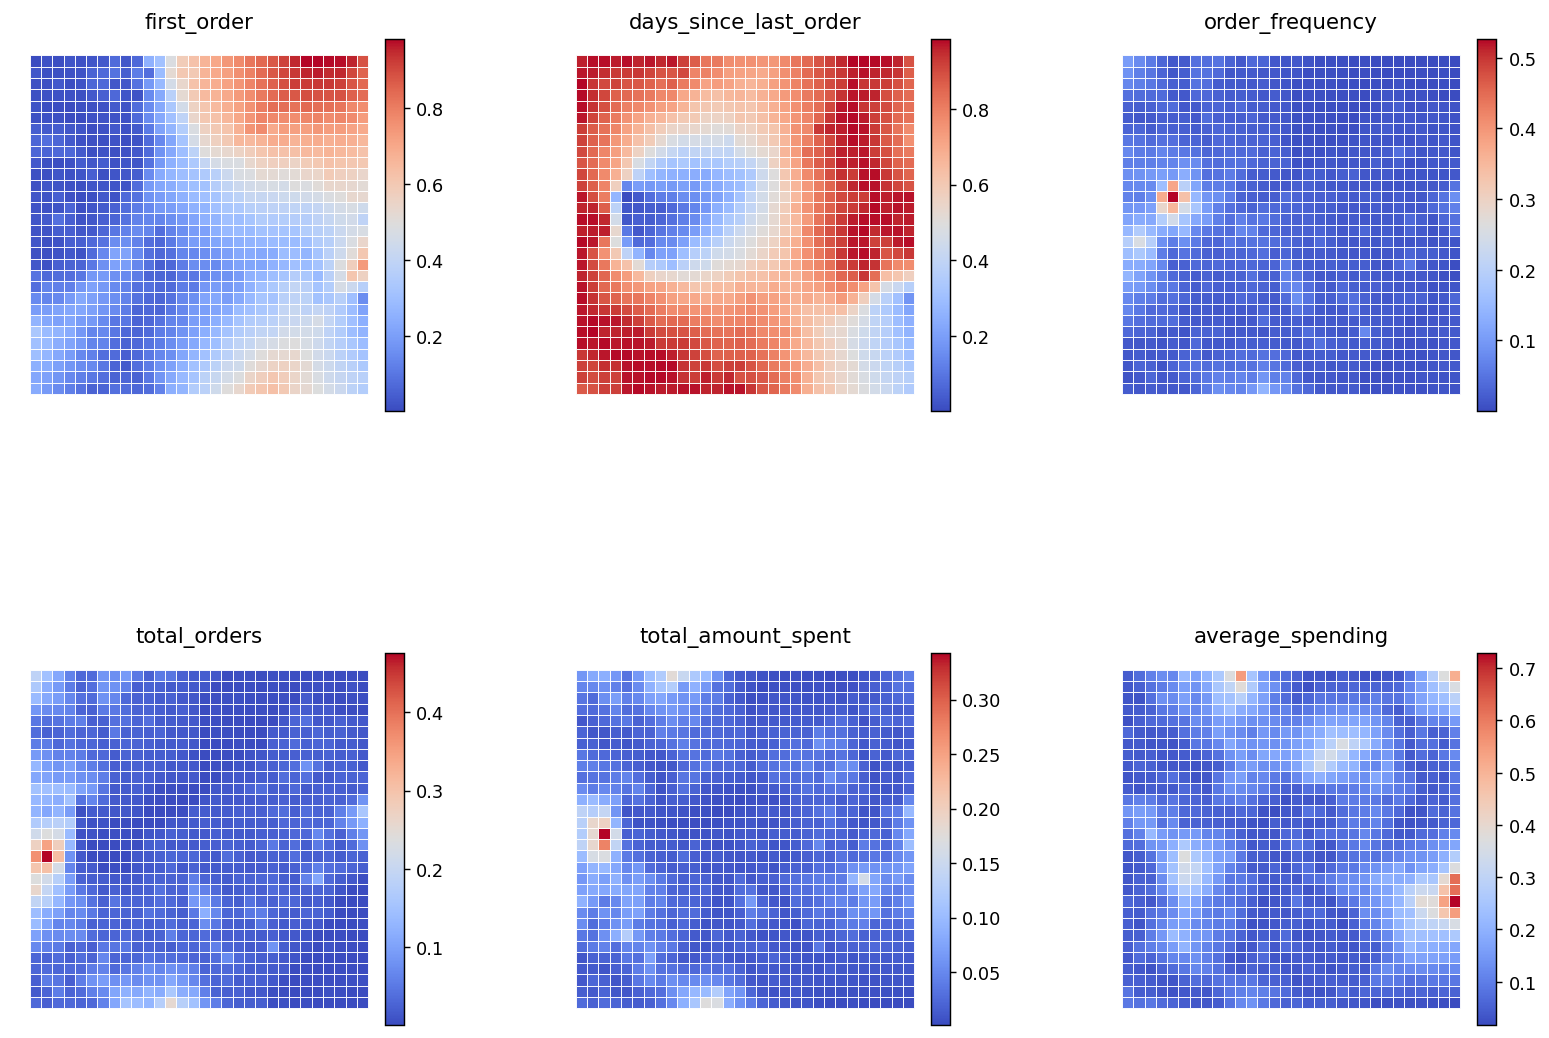

In [ ]:
# plot the hexagons for each feature in the perspective
figsize=(12, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(2, 3, wspace=0.2, hspace=0.4) 

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(behaviours.columns)), subfigs.flatten()):
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))

    sf = plot_rectangles(
        sm, sf, 
        colornorm,
        matrix_vals,
        label=behaviours.columns[cpi],
        cmap=cm.coolwarm)

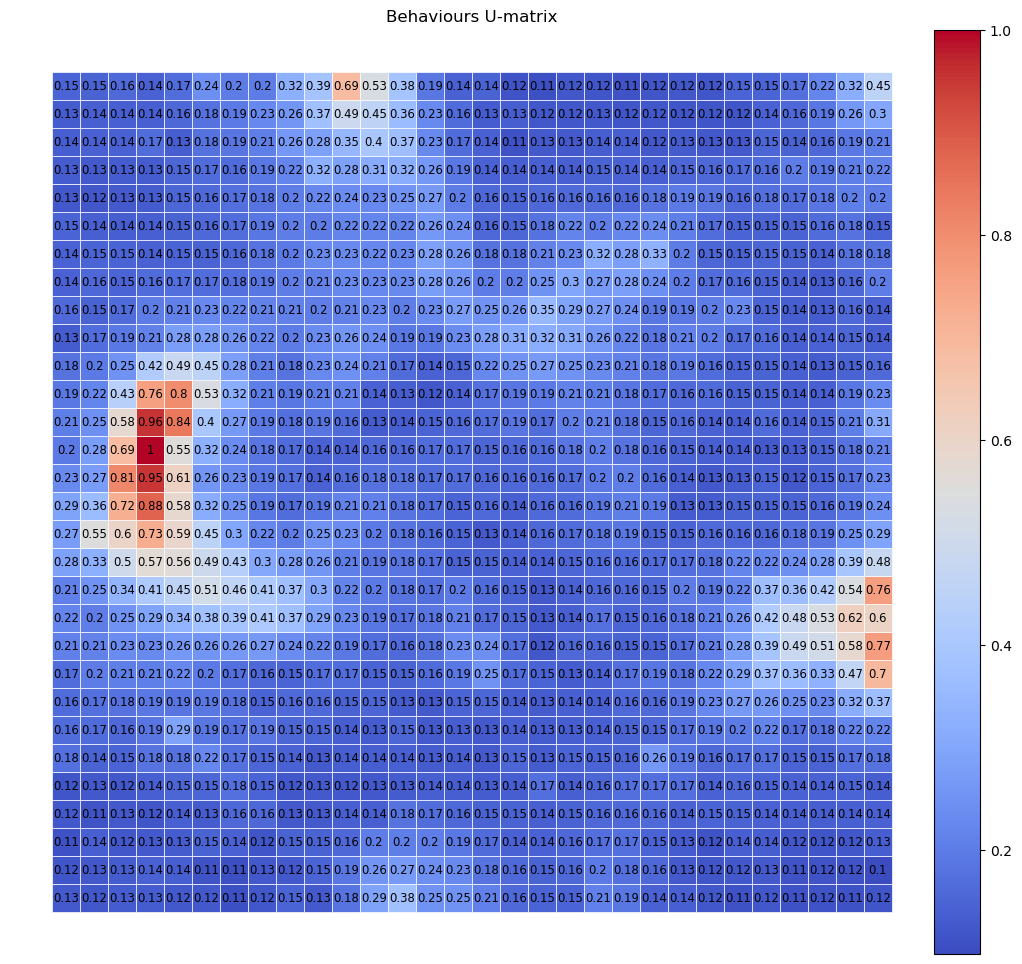

In [ ]:
# plot the U-matrix for the SOM 
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    umatrix,
                    label="Behaviours U-matrix",
                    cmap=cm.coolwarm,
                    annot=True)

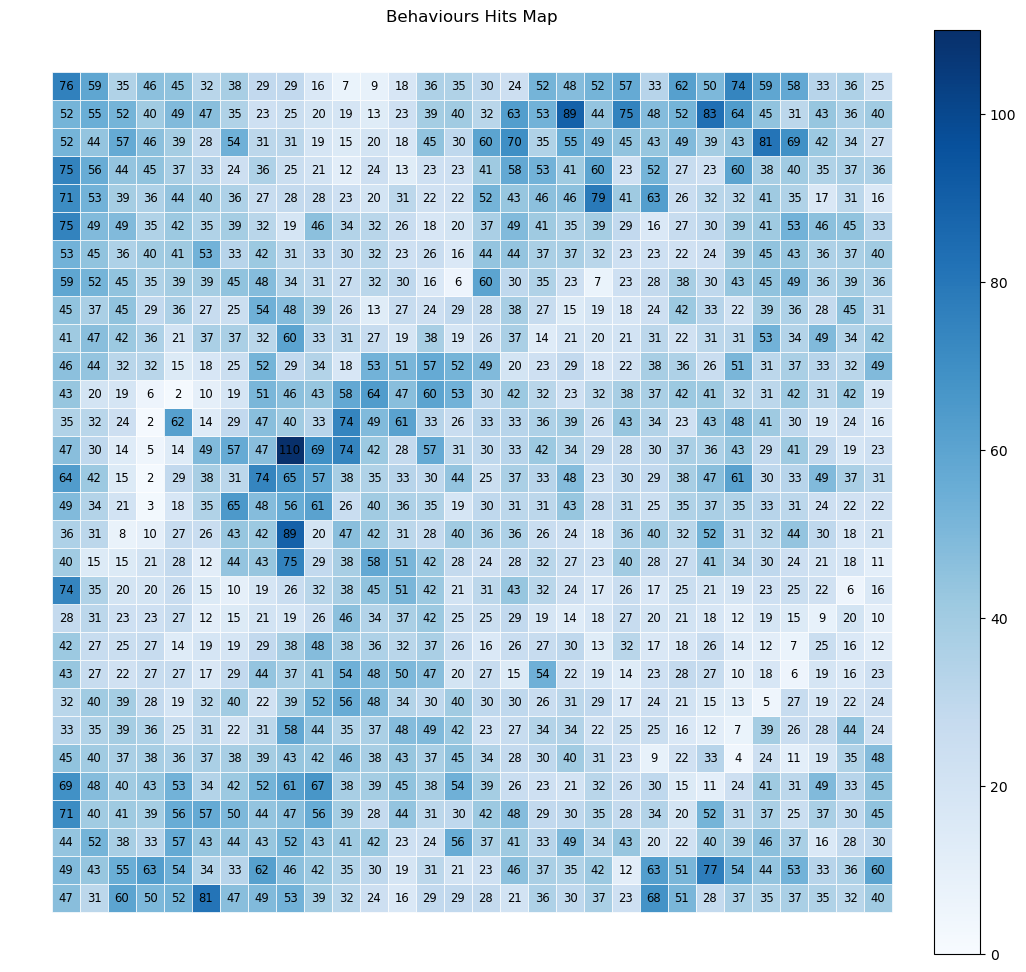

In [ ]:
# plot the hits map for the SOM
hitsmatrix = sm.activation_response(behaviours.values)

fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="Behaviours Hits Map",
                    cmap=cm.Blues,
                    annot=True)

### K-Means implementation

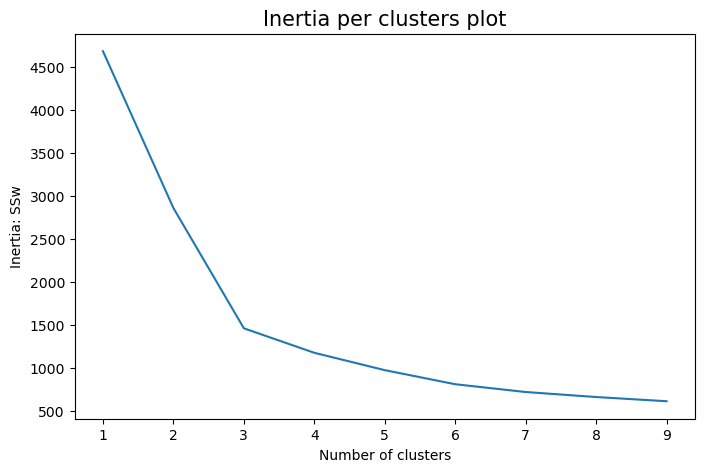

In [ ]:
# deciding on the optimal number of clusters to use in the KMeans model

range_clusters = range(1, 10)

inertia = []

for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(behaviours)
    inertia.append(kmclust.inertia_)

# plot inertia
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia per clusters plot", size=15)

plt.show()

In [ ]:
# flattened the weights of the neurons into a 2D list
behaviours_weights_flat = sm.get_weights().reshape((M*N),len(behaviours.columns))
behaviours_weights_flat.shape

(900, 6)

In [ ]:
# perform K-Means clustering on top of the SOM weights
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
kmeans_behaviors_labels = kmeans.fit_predict(behaviours_weights_flat)

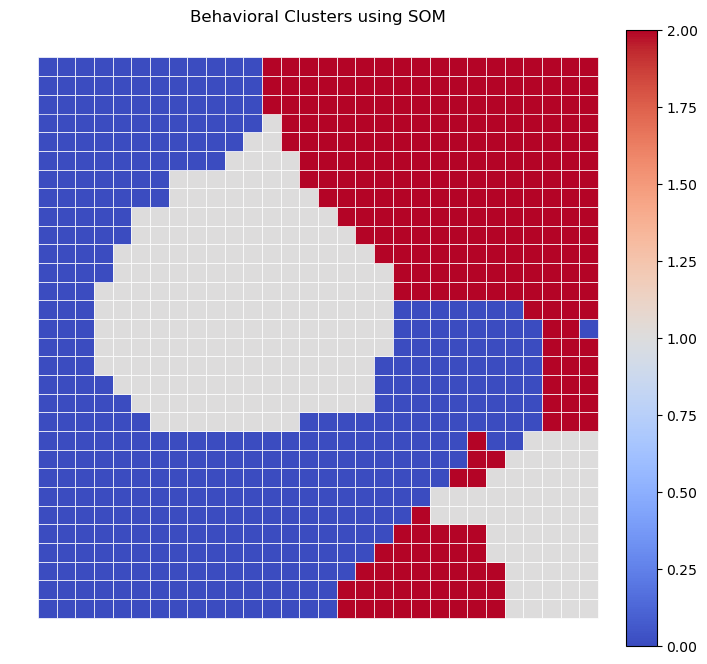

In [ ]:
# plot the clusters on the SOM
kmeans_matrix = kmeans_behaviors_labels.reshape((M,N))

fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(kmeans_matrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    kmeans_matrix,
                    label="Behavioral Clusters using SOM",
                    cmap=cm.coolwarm)

In [ ]:
# evaluate the clustering quality using silhouette score and Davies-Bouldin index

som_behaviors_score = silhouette_score(behaviours_weights_flat, kmeans_behaviors_labels, metric='euclidean')
print(f'Silhouette Score: {round(som_behaviors_score,3)}') 

som_behaviors_index = davies_bouldin_score(behaviours_weights_flat, kmeans_behaviors_labels)
print(f'Davies-Bouldin Index: {round(som_behaviors_index,3)}') 

Silhouette Score: 0.416
Davies-Bouldin Index: 0.843


In [ ]:
# check the nodes and respective clusters
behaviour_nodes = behaviours_weights_flat

df_behaviors_nodes = pd.DataFrame(behaviour_nodes, columns=behaviours.columns)
df_behaviors_nodes['som_cluster'] = kmeans_behaviors_labels
df_behaviors_nodes

first_order  days_since_last_order  order_frequency  total_orders  \
0       0.235447               0.872674         0.019014      0.030636   
1       0.223135               0.916718         0.009584      0.016016   
2       0.252952               0.915947         0.012874      0.021814   
3       0.301591               0.930058         0.016175      0.028230   
4       0.302908               0.975056         0.015220      0.028293   
..           ...                    ...              ...           ...   
895     0.767084               0.829382         0.009606      0.013492   
896     0.836994               0.836567         0.001425      0.000558   
897     0.845115               0.851009         0.002262      0.002167   
898     0.853968               0.862540         0.001765      0.001492   
899     0.883976               0.886210         0.001580      0.001426   

     total_amount_spent  average_spending  som_cluster  
0              0.026085          0.089516            0  
1              0.015830          0.084164            0  
2              0.011484          0.050317            0  
3              0.012489          0.045277            0  
4              0.010321          0.037869            0  
..                  ...               ...          ...  
895            0.024565          0.151801            2  
896            0.017969          0.235166            2  
897            0.025524          0.289845            2  
898            0.030363          0.363018            2  
899            0.042453          0.509287            2  

[900 rows x 7 columns]

In [ ]:
# get BMU coordinates for each data point
bmu_index = np.array([sm.winner(x) for x in behaviours.values])

print(bmu_index.shape)

bmu_index

(31525, 2)


array([[ 4, 17],
       [ 4, 17],
       [ 4, 17],
       ...,
       [26, 29],
       [26, 29],
       [24, 29]], dtype=int64)

In [ ]:
# get the final labels for each data point
som_final_behaviour_labels = [kmeans_matrix[i[0]][i[1]] for i in bmu_index]

In [ ]:
# add the final labels to the main dataframe
df['beh_som_cluster'] = som_final_behaviour_labels

df.head()

CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e       0.000000   0.000000            0.0       0.0   
5d272b9dcb       0.045751   0.007126            0.0       0.0   
f6d1b2ba63       0.032833   0.000000            0.0       0.0   
180c632ed8       0.000000   0.015278            0.0       0.0   
4eb37a6705       0.051997   0.045578            0.0       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0           0.0          0.0   
5d272b9dcb                  0.0          0.0           0.0          0.0   
f6d1b2ba63                  0.0          0.0           0.0          0.0   
180c632ed8                  0.0          0.0           0.0          0.0   
4eb37a6705                  0.0          0.0           0.0          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e     0.093442          0.0           0.0                0.0   
5d272b9dcb     0.000000          0.0           0.0                0.0   
f6d1b2ba63     0.000000          0.0           0.0                0.0   
180c632ed8     0.057786          0.0           0.0                0.0   
4eb37a6705     0.000000          0.0           0.0                0.0   

             CUI_OTHER  CUI_Street Food / Snacks  CUI_Thai   DOW_0     DOW_1  \
customer_id                                                                    
1b8f824d5e         0.0                       0.0       0.0  0.0625  0.000000   
5d272b9dcb         0.0                       0.0       0.0  0.0625  0.000000   
f6d1b2ba63         0.0                       0.0       0.0  0.0625  0.000000   
180c632ed8         0.0                       0.0       0.0  0.0000  0.058824   
4eb37a6705         0.0                       0.0       0.0  0.0000  0.058824   

             DOW_2  DOW_3  DOW_4  DOW_5  DOW_6  HR_0  HR_1  HR_10     HR_11  \
customer_id                                                                   
1b8f824d5e     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.000000   
5d272b9dcb     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.04  0.027778   
f6d1b2ba63     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.027778   
180c632ed8     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.027778   
4eb37a6705     0.0    0.0    0.0    0.0   0.05   0.0   0.0   0.00  0.000000   

             HR_12  HR_13     HR_14  HR_15  HR_16  HR_17     HR_18  HR_19  \
customer_id                                                                 
1b8f824d5e     0.0    0.0  0.000000    0.0    0.0    0.0  0.083333    0.0   
5d272b9dcb     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   
f6d1b2ba63     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   
180c632ed8     0.0    0.0  0.076923    0.0    0.0    0.0  0.000000    0.0   
4eb37a6705     0.0    0.0  0.000000    0.0    0.0    0.0  0.000000    0.0   

             HR_2  HR_20  HR_21  HR_22  HR_23  HR_3  HR_4  HR_5  HR_6  HR_7  \
customer_id                                                                   
1b8f824d5e    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
5d272b9dcb    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
f6d1b2ba63    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
180c632ed8    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   
4eb37a6705    0.0    0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   

                 HR_8      HR_9  average_spending  customer_age  \
customer_id                                                       
1b8f824d5e   0.000000  0.000000          0.135354      0.046154   
5d272b9dcb   0.000000  0.000000          0.088841      0.030769   
f6d1b2ba63   0.000000  0.043478          0

In [ ]:
# characterize the final clusters
behaviour_columns = behaviours.columns.tolist()

behaviours['beh_som_cluster'] = som_final_behaviour_labels

behaviours[behaviour_columns + ['beh_som_cluster']].groupby('beh_som_cluster').mean()

first_order  days_since_last_order  order_frequency  \
beh_som_cluster                                                        
0                   0.146864               0.857766         0.038563   
1                   0.202784               0.341556         0.042834   
2                   0.666636               0.810065         0.010245   

                 total_orders  total_amount_spent  average_spending  
beh_som_cluster                                                      
0                    0.063711            0.039824          0.081530  
1                    0.012932            0.014837          0.103513  
2                    0.014332            0.017074          0.108973

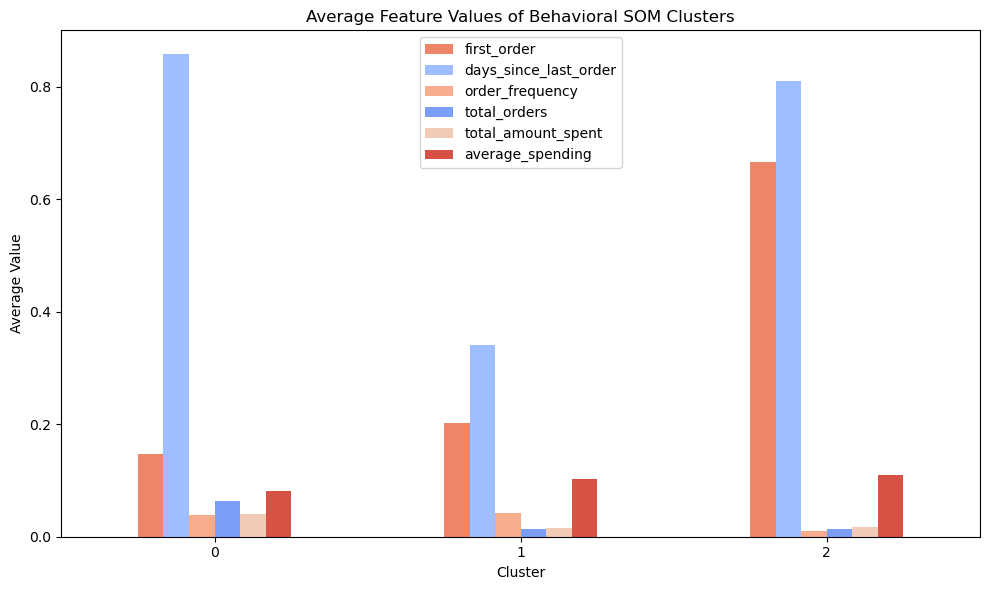

In [ ]:
# plot the average feature values of the clusters
features = ['first_order','days_since_last_order', 'order_frequency', 'total_orders', 
            'total_amount_spent', 'average_spending']

cluster_means = behaviours[features + ['beh_som_cluster']].groupby('beh_som_cluster').mean()

cmap = cm.coolwarm
first_order_color = cmap(0.8)
days_since_last_order_color = cmap(0.3)
order_frequency_color = cmap(0.7)
total_orders_color = cmap(0.2)
total_amount_spent_color = cmap(0.6)
average_spending_color = cmap(0.9)

colors = [first_order_color, days_since_last_order_color, order_frequency_color,
          total_orders_color, total_amount_spent_color, average_spending_color]

ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Behavioral SOM Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

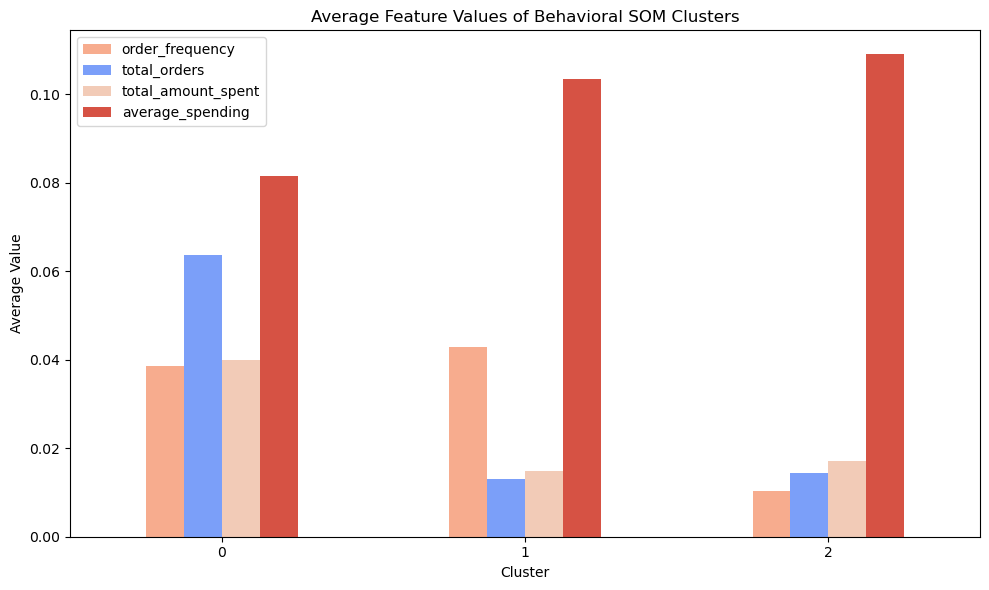

In [ ]:
# plot the average feature values of the clusters
features = ['order_frequency', 'total_orders', 
            'total_amount_spent', 'average_spending']

cluster_means = behaviours[features + ['beh_som_cluster']].groupby('beh_som_cluster').mean()

cmap = cm.coolwarm
order_frequency_color = cmap(0.7)
total_orders_color = cmap(0.2)
total_amount_spent_color = cmap(0.6)
average_spending_color = cmap(0.9)

colors = [order_frequency_color, total_orders_color, total_amount_spent_color, average_spending_color]

ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Behavioral SOM Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [ ]:
# evaluate the clustering solution appropriateness using the R-squared metric
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss 

sst = get_ss(behaviours)
ssw_labels = behaviours[behaviour_columns + ['beh_som_cluster']].groupby('beh_som_cluster').apply(get_ss)
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
round(r2, 3)

0.946

### Cluster visualization using U-Map

In [ ]:
# comparing the performance of different distance metrics, using their resulting silhouette score and Davies-Bouldin index
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'minkowski', 'hamming']

# list to store the results
results = []

# itereate over each distance metric
for metric in distance_metrics:
    # apply UMAP for dimensionality reduction
    reducer = umap.UMAP(n_neighbors=5, n_components=2, metric=metric)
    embedding = reducer.fit_transform(behaviours[behaviour_columns])

    # cluster the data using KMeans
    kmeans = KMeans(n_clusters=5, random_state=42).fit(embedding)
    cluster_labels = kmeans.labels_

    # evaluate the clustering quality
    silhouette = silhouette_score(embedding, cluster_labels)
    db_index = davies_bouldin_score(embedding, cluster_labels)

    results.append((metric, silhouette, db_index, silhouette + db_index))

# create a dataframe that contains the results
results_df = pd.DataFrame(results, columns=['Metric', 'Silhouette Score', 'Davies-Bouldin Index', 'Combined Score'])

# find the metric with the best (lowest) combined score
best_metric = results_df.loc[results_df['Combined Score'].idxmin(), 'Metric']

print("Best Metric:", best_metric)

Best Metric: cosine


In [ ]:
# apply UMAP for clustering visualization, using best performing distance metric
reducer = umap.UMAP(n_neighbors=10, n_components=2, metric='cosine') # n_neighbors was chosen by experimenting and comparing silhouette scores and Davies-Bouldin indexes
embedding = reducer.fit_transform(behaviours[behaviour_columns], y=behaviours['beh_som_cluster']) 
embedding

array([[14.160949  , 13.221933  ],
       [14.100102  , 13.192288  ],
       [14.010168  , 13.165337  ],
       ...,
       [ 5.4840827 , 19.356573  ],
       [ 5.3519335 , 20.855795  ],
       [ 3.1236541 , -0.91720426]], dtype=float32)

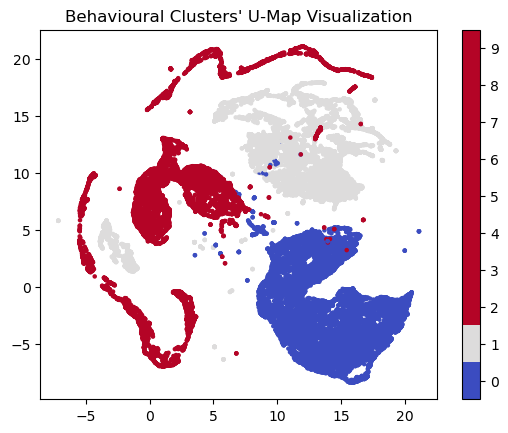

In [ ]:
# plot the clusters
plt.scatter(embedding[:, 0], embedding[:, 1], c= behaviours['beh_som_cluster'], cmap='coolwarm', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("Behavioural Clusters' U-Map Visualization")
plt.show()

In [ ]:
# evaluate the clustering solution
silhouette_avg = silhouette_score(embedding, behaviours['beh_som_cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

db_index = davies_bouldin_score(embedding, behaviours['beh_som_cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.42
Davies-Bouldin Index: 1.09


### Cluster visualization using t-SNE

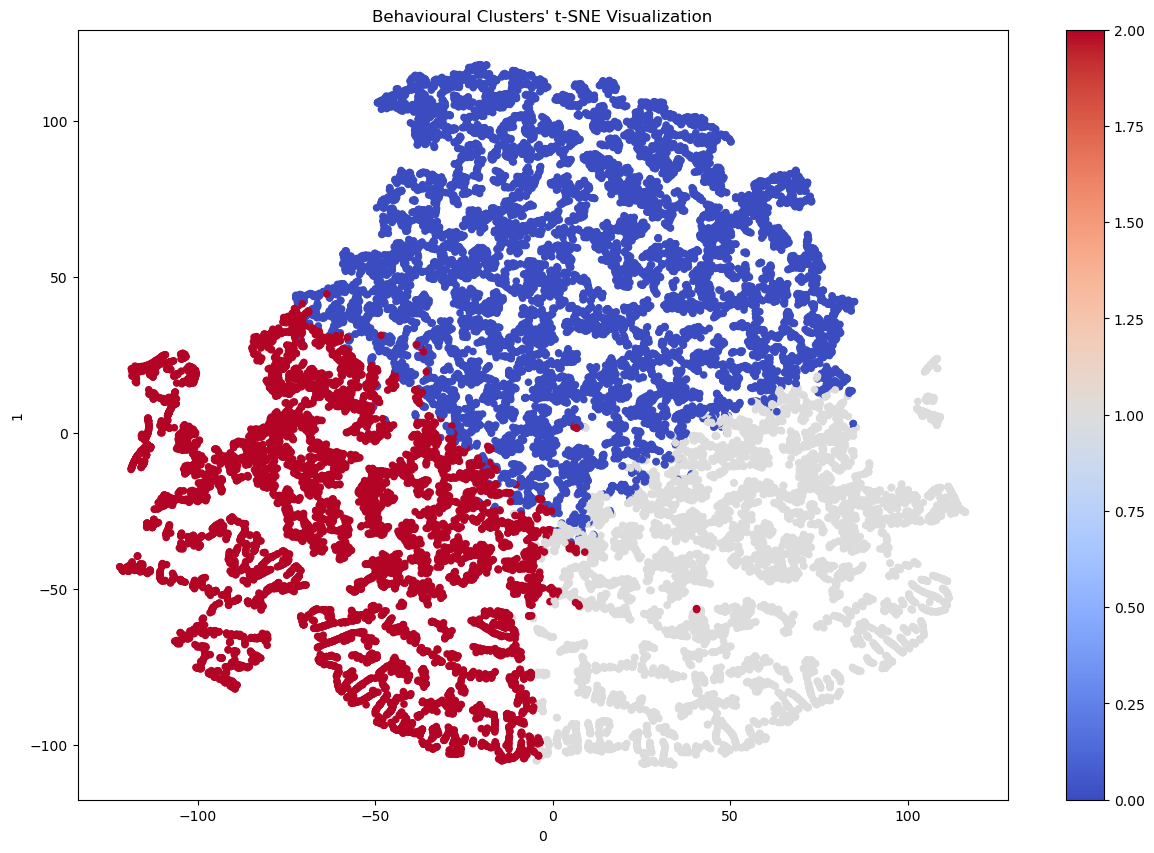

In [ ]:
# apply t-SNE
two_dim = TSNE(random_state=42).fit_transform(behaviours[behaviour_columns])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=behaviours['beh_som_cluster'], colormap='coolwarm', figsize=(15,10))
plt.title("Behavioural Clusters' t-SNE Visualization")
plt.show()

## Merging Perspectives

In [134]:
pd.crosstab(df['preferences_labels'],
            df['behaviours_labels'])

behaviours_labels      0     1    2     3     4
preferences_labels                             
0                   2058  4131  772   843  1716
1                   2042  6360  936  1343  2435
2                   1763   438  344    64  1113
3                   2446   457  448    68  1732

In [135]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['preferences_labels', 'behaviours_labels'])\
    [metric_features].mean()

df_centroids

HR_3      HR_4      HR_5      HR_6  \
preferences_labels behaviours_labels                                           
0                  0                 -0.093871 -0.112467 -0.085729 -0.092999   
                   1                  0.013308 -0.000401  0.039563  0.015688   
                   2                  0.142653  0.115094  0.019529  0.066164   
                   3                  0.367276  0.456008  0.437097  0.469795   
                   4                 -0.126853 -0.103022 -0.110647 -0.076320   
1                  0                 -0.107456 -0.095902 -0.107745 -0.108363   
                   1                  0.015015  0.010811  0.028948  0.014352   
                   2                  0.165718  0.107628  0.071023  0.069129   
                   3                  0.362433  0.508179  0.493365  0.454718   
                   4                 -0.125391 -0.143311 -0.105610 -0.123859   
2                  0                 -0.055949 -0.070308 -0.094881 -0.067927   
                   1                 -0.001034  0.006134 -0.038517  0.050400   
                   2                  0.087289 -0.021203  0.094294  0.016587   
                   3                  1.044964  0.656796  0.552798  0.875158   
                   4                 -0.064306 -0.108268 -0.101527 -0.111500   
3                  0                 -0.077558 -0.079449 -0.115254 -0.089624   
                   1                  0.085555 -0.068620 -0.016024 -0.046573   
                   2                  0.145759  0.087243  0.000660 -0.009483   
                   3                  0.615756  0.738460  0.384201  0.722223   
                   4                 -0.122103 -0.081863 -0.094088 -0.105522   

                                          HR_7      HR_8      HR_9  \
preferences_labels behaviours_labels                                 
0                  0                 -0.105229 -0.106987 -0.161675   
                   1                  0.022828  0.003765  0.021321   
                   2                 -0.019366 -0.088502 -0.094323   
                   3                  0.516098  0.726564  0.961985   
                   4                 -0.122460 -0.129719 -0.216613   
1                  0                 -0.103162 -0.109263 -0.173860   
                   1                  0.017620  0.017159  0.017415   
                   2                 -0.003777 -0.064288 -0.046478   
                   3                  0.532964  0.600181  1.097050   
                   4                 -0.130272 -0.150972 -0.209360   
2                  0                 -0.090202 -0.088268 -0.149337   
                   1                 -0.017181  0.013532  0.049374   
                   2                 -0.004499 -0.089823 -0.132192   
                   3                  0.208404  0.673018  0.942657   
                   4                 -0.109124 -0.132224 -0.200457   
3                  0                 -0.089601 -0.106395 -0.144157   
                   1                 -0.030722 -0.023114  0.018823   
                   2                  0.008106 -0.092833 -0.109227   
                   3                  0.921577  0.897650  1.433873   
                   4                 -0.114071 -0.114162 -0.191427   

                                      average_spending  customer_age  \
preferences_labels behaviours_labels                                   
0                  0                         -0.129819      0.006706   
                   1                         -0.321108     -0.000120   
                   2                          2.358192      0.009699   
                   3                         -0.094348     -0.017485   
                   4                         -0.088148      0.004442   
1                  0                         -0.148315      0.017372   
                   1                         -0.330887     -0.007776   
                   2                          2.402998     -0.011049   
                   3

In [136]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

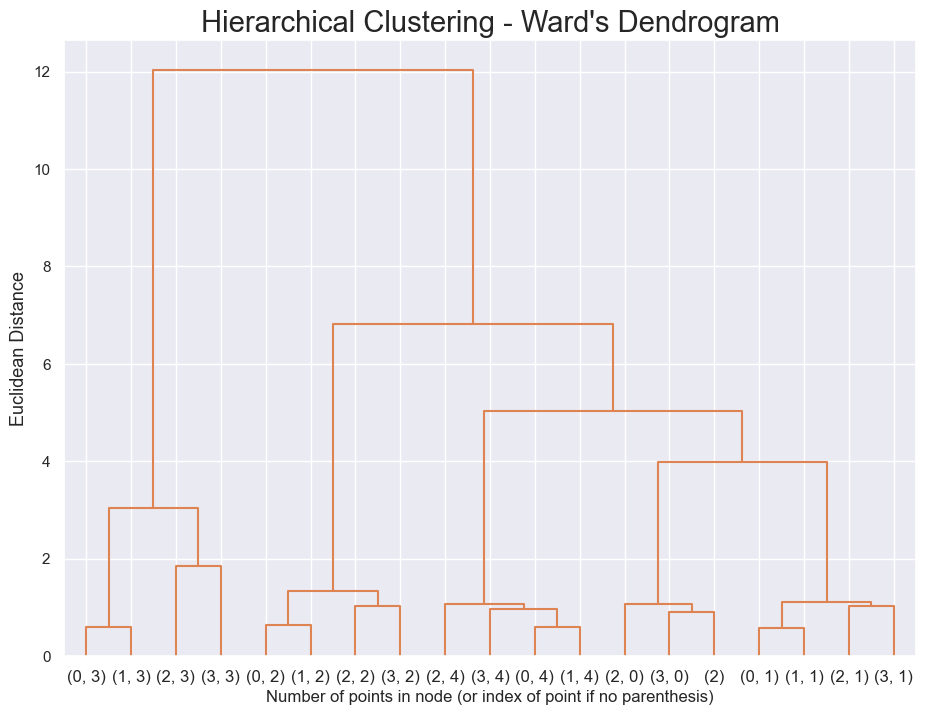

In [137]:
from scipy.cluster.hierarchy import dendrogram

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,8))
# The Dendrogram parameters need to be tuned
y_threshold = 60
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

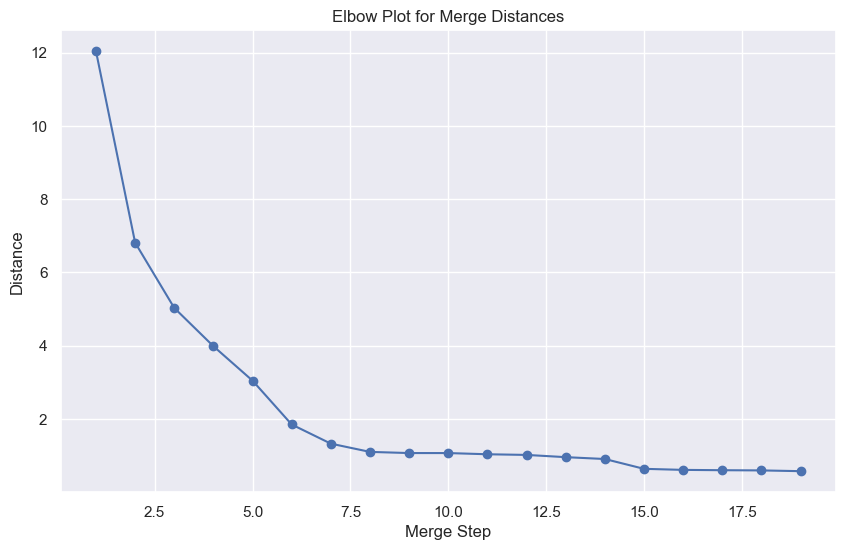

In [138]:
from scipy.cluster.hierarchy import linkage

# Compute the linkage matrix
linkage_matrix = linkage(df_centroids, method='ward')

# Extract distances for the elbow plot
distances = linkage_matrix[:, 2]

# Plot the elbow plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(distances) + 1), distances[::-1], marker="o")
plt.title("Elbow Plot for Merge Distances")
plt.xlabel("Merge Step")
plt.ylabel("Distance")
plt.show()


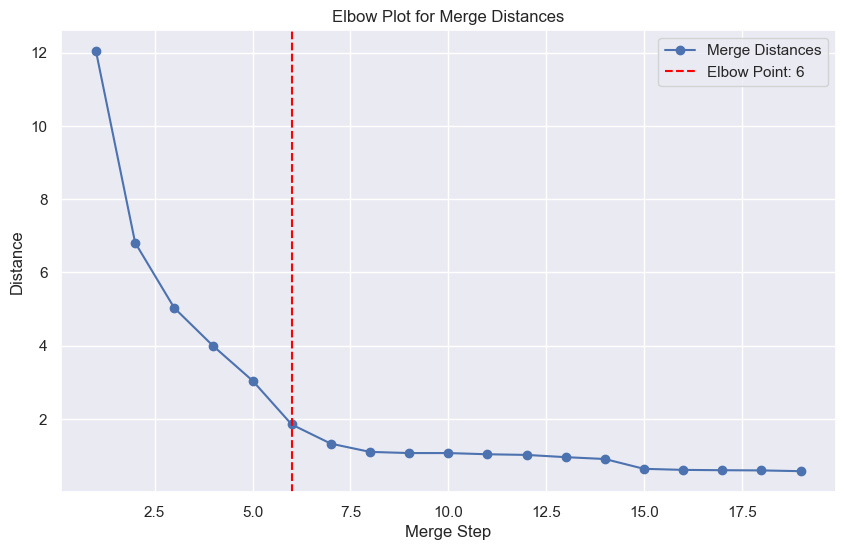

The elbow point occurs at merge step: 6


In [139]:
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
import numpy as np
from kneed import KneeLocator

# Compute the linkage matrix
linkage_matrix = linkage(df_centroids, method='ward')

# Extract distances for the elbow plot
distances = linkage_matrix[:, 2]

# Reverse distances to match the plot order
merge_steps = range(1, len(distances) + 1)
reversed_distances = distances[::-1]

# Identify the elbow point
knee_locator = KneeLocator(merge_steps, reversed_distances, curve="convex", direction="decreasing")
elbow_point = knee_locator.knee

# Plot the elbow plot with the elbow point highlighted
plt.figure(figsize=(10, 6))
plt.plot(merge_steps, reversed_distances, marker="o", label="Merge Distances")
plt.axvline(x=elbow_point, color="red", linestyle="--", label=f"Elbow Point: {elbow_point}")
plt.title("Elbow Plot for Merge Distances")
plt.xlabel("Merge Step")
plt.ylabel("Distance")
plt.legend()
plt.show()

print(f"The elbow point occurs at merge step: {elbow_point}")


In [140]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

# Test thresholds and evaluate the number of clusters
thresholds = range(40, 101, 10)  # Test thresholds from 40 to 100 with step size 10
best_threshold = None
best_silhouette = -1

# Replace 'data' with the DataFrame or array you used to generate linkage_matrix
for t in thresholds:
    clusters = fcluster(linkage_matrix, t=t, criterion="distance")
    num_clusters = len(np.unique(clusters))
    if num_clusters > 1:  # Silhouette Score is undefined for 1 cluster
        silhouette_avg = silhouette_score(df_centroids, clusters)  # Use centroids data
        print(f"Threshold: {t}, Clusters: {num_clusters}, Silhouette Score: {silhouette_avg:.3f}")
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_threshold = t

print(f"Best Threshold: {best_threshold} with Silhouette Score: {best_silhouette:.3f}")


Best Threshold: None with Silhouette Score: -1.000


In [141]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=5
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids

HR_3      HR_4      HR_5      HR_6  \
preferences_labels behaviours_labels                                           
0                  0                 -0.093871 -0.112467 -0.085729 -0.092999   
                   1                  0.013308 -0.000401  0.039563  0.015688   
                   2                  0.142653  0.115094  0.019529  0.066164   
                   3                  0.367276  0.456008  0.437097  0.469795   
                   4                 -0.126853 -0.103022 -0.110647 -0.076320   
1                  0                 -0.107456 -0.095902 -0.107745 -0.108363   
                   1                  0.015015  0.010811  0.028948  0.014352   
                   2                  0.165718  0.107628  0.071023  0.069129   
                   3                  0.362433  0.508179  0.493365  0.454718   
                   4                 -0.125391 -0.143311 -0.105610 -0.123859   
2                  0                 -0.055949 -0.070308 -0.094881 -0.067927   
                   1                 -0.001034  0.006134 -0.038517  0.050400   
                   2                  0.087289 -0.021203  0.094294  0.016587   
                   3                  1.044964  0.656796  0.552798  0.875158   
                   4                 -0.064306 -0.108268 -0.101527 -0.111500   
3                  0                 -0.077558 -0.079449 -0.115254 -0.089624   
                   1                  0.085555 -0.068620 -0.016024 -0.046573   
                   2                  0.145759  0.087243  0.000660 -0.009483   
                   3                  0.615756  0.738460  0.384201  0.722223   
                   4                 -0.122103 -0.081863 -0.094088 -0.105522   

                                          HR_7      HR_8      HR_9  \
preferences_labels behaviours_labels                                 
0                  0                 -0.105229 -0.106987 -0.161675   
                   1                  0.022828  0.003765  0.021321   
                   2                 -0.019366 -0.088502 -0.094323   
                   3                  0.516098  0.726564  0.961985   
                   4                 -0.122460 -0.129719 -0.216613   
1                  0                 -0.103162 -0.109263 -0.173860   
                   1                  0.017620  0.017159  0.017415   
                   2                 -0.003777 -0.064288 -0.046478   
                   3                  0.532964  0.600181  1.097050   
                   4                 -0.130272 -0.150972 -0.209360   
2                  0                 -0.090202 -0.088268 -0.149337   
                   1                 -0.017181  0.013532  0.049374   
                   2                 -0.004499 -0.089823 -0.132192   
                   3                  0.208404  0.673018  0.942657   
                   4                 -0.109124 -0.132224 -0.200457   
3                  0                 -0.089601 -0.106395 -0.144157   
                   1                 -0.030722 -0.023114  0.018823   
                   2                  0.008106 -0.092833 -0.109227   
                   3                  0.921577  0.897650  1.433873   
                   4                 -0.114071 -0.114162 -0.191427   

                                      average_spending  customer_age  \
preferences_labels behaviours_labels                                   
0                  0                         -0.129819      0.006706   
                   1                         -0.321108     -0.000120   
                   2                          2.358192      0.009699   
                   3                         -0.094348     -0.017485   
                   4                         -0.088148      0.004442   
1                  0                         -0.148315      0.017372   
                   1                         -0.330887     -0.007776   
                   2                          2.402998     -0.011049   
                   3

In [142]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['preferences_labels'], row['behaviours_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean(numeric_only=True)[metric_features]

HR_3      HR_4      HR_5      HR_6      HR_7      HR_8  \
merged_labels                                                               
0              0.390471  0.500064  0.471340  0.479657  0.529269  0.656881   
1              0.016610  0.003375  0.028399  0.013778  0.016231  0.010543   
2              0.144227  0.088553  0.045714  0.046896 -0.006561 -0.080394   
3             -0.115217 -0.112641 -0.103343 -0.105693 -0.120981 -0.133663   
4             -0.084361 -0.089731 -0.101773 -0.090462 -0.096932 -0.103400   

                   HR_9  average_spending  customer_age  \
merged_labels                                             
0              1.053549         -0.085780     -0.000536   
1              0.020118         -0.325035     -0.001362   
2             -0.084291          2.398290      0.022324   
3             -0.205283         -0.152368     -0.011787   
4             -0.156895         -0.121537      0.005908   

               days_since_last_order  first_order  order_frequency  \
merged_labels                                                        
0                           0.690975    -0.877085         1.832504   
1                           0.523352    -0.568664        -0.062905   
2                          -0.192216     0.423232        -0.383474   
3                          -1.476485    -0.465380         0.206840   
4                           0.382097     1.297878        -0.535260   

               total_amount_spent  total_orders  vendor_loyalty_score  \
merged_labels                                                           
0                        2.142744      2.327304              0.288931   
1                       -0.000740      0.163532              0.372140   
2                        0.486142     -0.419607              0.566825   
3                       -0.449299     -0.446742              0.606131   
4                       -0.426512     -0.449060              0.713898   

               relative_cuisine_variety  chain_consumption  
merged_labels                                               
0                              0.294661           0.647394  
1                              0.239587           0.647937  
2                              0.185233           0.605400  
3                              0.185443           0.634378  
4                              0.146110           0.594435

In [143]:
cluster_mapper 

{(0, 0): 4,
 (0, 1): 1,
 (0, 2): 2,
 (0, 3): 0,
 (0, 4): 3,
 (1, 0): 4,
 (1, 1): 1,
 (1, 2): 2,
 (1, 3): 0,
 (1, 4): 3,
 (2, 0): 4,
 (2, 1): 1,
 (2, 2): 2,
 (2, 3): 0,
 (2, 4): 3,
 (3, 0): 4,
 (3, 1): 1,
 (3, 2): 2,
 (3, 3): 0,
 (3, 4): 3}

In [144]:
df_

CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
0         -0.419982  -0.424012      -0.271954 -0.125188           -0.210800   
1          0.676943  -0.153769      -0.271954 -0.125188           -0.210800   
2          0.367203  -0.424012      -0.271954 -0.125188           -0.210800   
3         -0.419982   0.155382      -0.271954 -0.125188           -0.210800   
4          0.826679   1.304442      -0.271954 -0.125188           -0.210800   
...             ...        ...            ...       ...                 ...   
31504     -0.419982  -0.424012      -0.271954 -0.125188            0.265684   
31505     -0.419982  -0.424012      -0.271954 -0.125188           -0.210800   
31506     -0.419982  -0.424012      -0.271954 -0.125188           -0.210800   
31507     -0.419982  -0.424012      -0.271954 -0.125188           -0.210800   
31508     -0.196661  -0.424012      -0.271954 -0.125188           -0.210800   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  ...  \
0        -0.175258     -0.168598    -0.163673    3.646707    -0.288406  ...   
1        -0.175258     -0.168598    -0.163673   -0.219712    -0.288406  ...   
2        -0.175258     -0.168598    -0.163673   -0.219712    -0.288406  ...   
3        -0.175258     -0.168598    -0.163673    2.171363    -0.288406  ...   
4        -0.175258     -0.168598    -0.163673   -0.219712    -0.288406  ...   
...            ...           ...          ...         ...          ...  ...   
31504    -0.175258     -0.168598    -0.163673   -0.219712    -0.288406  ...   
31505    -0.175258     -0.168598    -0.163673   -0.219712    -0.123692  ...   
31506    -0.175258     -0.168598    -0.163673   -0.219712    -0.288406  ...   
31507    -0.175258     -0.168598    -0.163673   -0.219712    -0.288406  ...   
31508    -0.175258     -0.168598    -0.163673   -0.219712    -0.288406  ...   

       age_group  customer_lifecycle_stage  peak_order_day  peak_order_hour  \
0           0-20                    Active           DOW_0            HR_18   
1           0-20                    Active           DOW_0            HR_10   
2          31-40                    Active           DOW_0             HR_9   
3          21-30                    Active           DOW_1            HR_11   
4           0-20                    Active           DOW_1             HR_8   
...          ...                       ...             ...              ...   
31504       0-20                       New           DOW_4            HR_16   
31505      31-40                       New           DOW_4             HR_9   
31506      31-40                       New           DOW_4            HR_20   
31507      41-50                       New           DOW_4            HR_15   
31508      21-30                       New           DOW_4            HR_16   

       preferences_labels  Cluster_Pr  behaviours_labels  km_labels_beh  \
0                       0           0                  3              3   
1                       1           1                  3              3   
2                       3           3                  3              3   
3                       0           0                  3              3   
4                       0           0                  3              3   
...                   ...         ...                ...            ...   
31504                   1           1                  0              0   
31505                   3           3                  0              0   
31506                   3           3                  0              0   
31507                   3           3                  0              0   
31508                   2           2                  0              0   

       Cluster  merged_labels  
0            3              0  
1            3              0  
2            3              0  
3            3              0  
4            3              0  
...        ...            ...  
31504        0              4  
315

In [145]:
# merge cluster contigency table
# getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# getting the preferences and behaviours labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['preferences_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['behaviours_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='preferences_labels', columns='behaviours_labels')

behaviours_labels      0      1     2     3     4
preferences_labels                               
3                   8309  11386  2500  2318  6996

In [146]:
# setting df to have the final preferences, behaviours and merged clusters
df = df_.copy()

## Profilling with unseen features

In [186]:
df[['merged_labels']].groupby(['merged_labels']).value_counts()

merged_labels
0     2318
1    11386
2     2500
3     6996
4     8309
Name: count, dtype: int64

In [276]:
# grouping by the sum of orders for each day of the week
orders_day_proportions = df[['merged_labels','DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].groupby(['merged_labels']).sum()

# calculate the total orders for each day 
orders_day_proportions['TotalOrders'] = orders_day_proportions.sum(axis=1)

# calculate the proportion of orders for each day
orders_day_proportions_ = orders_day_proportions.loc[:, 'DOW_0':'DOW_6'].div(orders_day_proportions['TotalOrders'], axis=0)

orders_day_proportions_

DOW_0     DOW_1     DOW_2     DOW_3     DOW_4     DOW_5  \
merged_labels                                                               
0              0.147359  0.148335  0.147987  0.149535  0.140498  0.130250   
1              0.126037  0.110550  0.143467  0.137894  0.157900  0.163253   
2              0.127303  0.138514  0.144313  0.148144  0.164840  0.131803   
3              0.141479  0.139008  0.146848  0.151128  0.153472  0.136529   
4              0.146573  0.140473  0.147691  0.142381  0.132768  0.141191   

                  DOW_6  
merged_labels            
0              0.136036  
1              0.160898  
2              0.145082  
3              0.131537  
4              0.148923

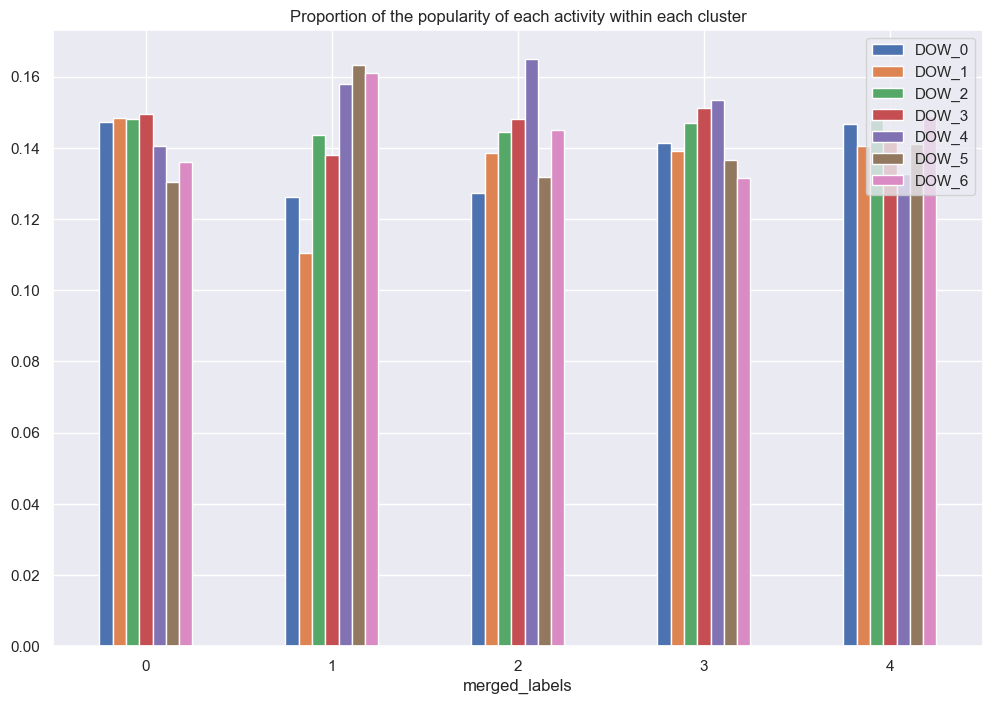

In [277]:
fig, ax = plt.subplots(figsize=(12,8))
orders_day_proportions_.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation=0)
plt.title("Proportion of the popularity of each activity within each cluster")
plt.show()

In [282]:
# grouping by 'amount_spent_per_cuisine' and summing the amount spent in cuisine types
cuisine_spent_sums = df[['merged_labels', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']].groupby(['merged_labels']).sum()

# since it's a proportion we can't have negative values, so we'll take the absolute value
cuisine_spent_sums = cuisine_spent_sums.abs()

# calculate the total spent for each cuisine label
cuisine_spent_sums['TotalSpent'] = cuisine_spent_sums.sum(axis=1)

# calculate the proportion of money spent for each cuisine
cuisine_spent_proportions = cuisine_spent_sums.loc[:, 'CUI_American':'CUI_Thai'].div(cuisine_spent_sums['TotalSpent'], axis=0)

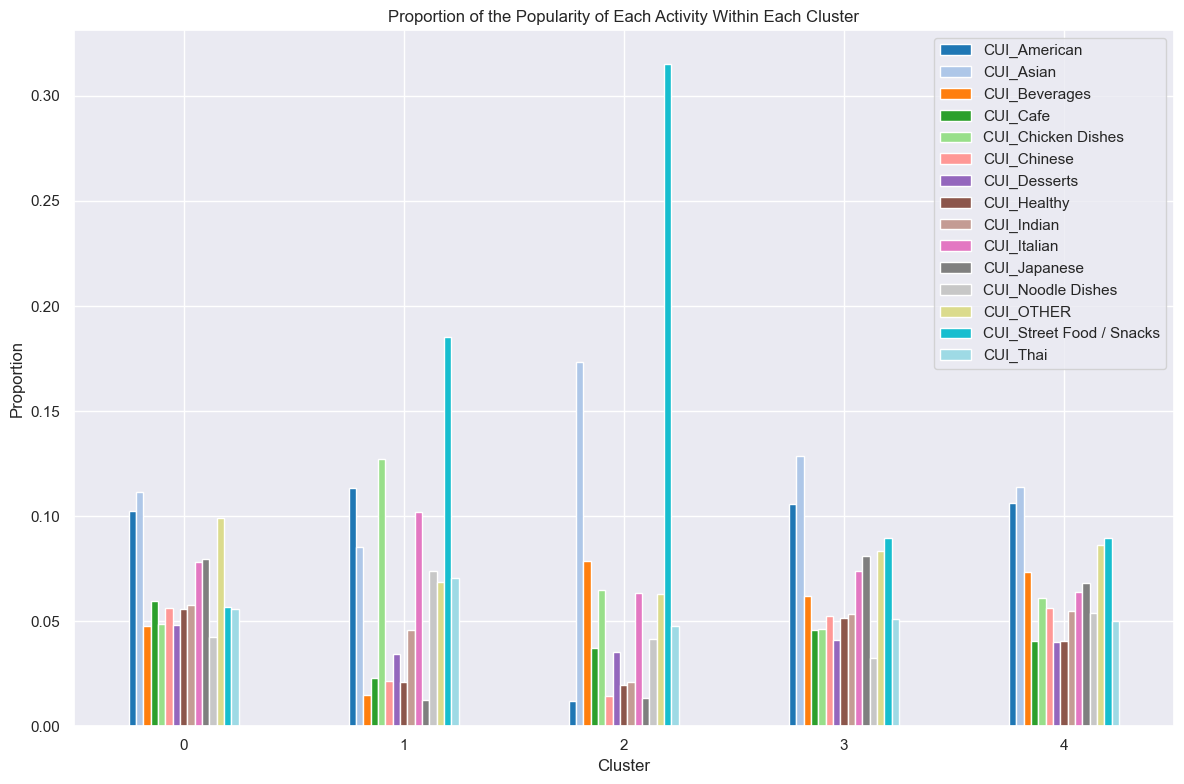

In [ ]:
# choose a color map, for example, "tab20" (good for distinct categories)
colors = cm.get_cmap('tab20', len(cuisine_spent_proportions.columns))

# plotting the proportions of activity popularity for each cluster
fig, ax = plt.subplots(figsize=(12, 8))
cuisine_spent_proportions.plot(kind='bar', stacked=False, ax=ax, color=colors(range(len(cuisine_spent_proportions.columns))))

# customize plot appearance
plt.xticks(rotation=0)
plt.title("Proportion of the Popularity of Each Activity Within Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


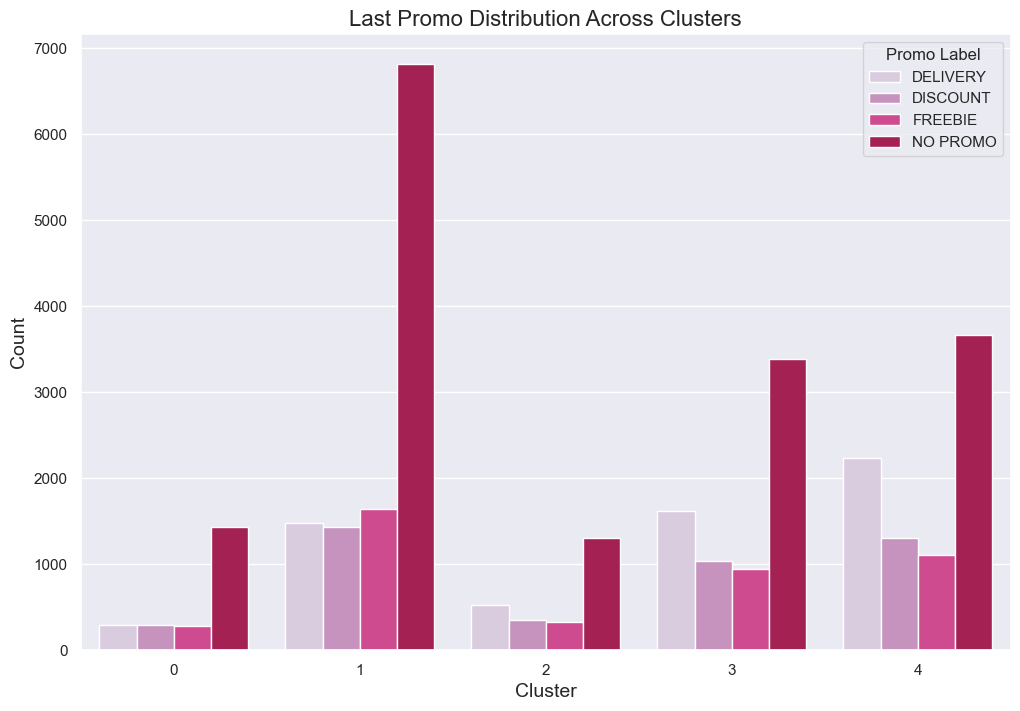

In [290]:
# Count occurrences of last_promo per cluster
last_promo_counts = df.groupby(['merged_labels', 'last_promo']).size().reset_index(name='count')

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(
    data=last_promo_counts,
    x='merged_labels',
    y='count',
    hue='last_promo',
    ax=ax,
    palette='PuRd'
)
plt.title("Last Promo Distribution Across Clusters", fontsize=16)
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Promo Label")
plt.show()
